In [1]:
import pandas as pd
import seaborn as sns
import warnings
import matplotlib as plt

warnings.filterwarnings('ignore')

# Fonte dos dados

- Poa: https://chronomax.com.br/app/2305/
- SP Intl: https://www.yescom.com.br/maratonasp/2023/resultados.asp
- Rio: http://www.chiptiming.com.br/resultados/maratonadorio2023/maratona42k
- SP City: https://www.chronomax.com.br/resultados/g-live.html?f=2023/2513/sp_city_marathon.clax
- Floripa: https://www.chronomax.com.br/resultados/g-live.html?f=2023/2708/maratona_de_floripa_internacional.clax
- Curitiba: https://www.chiptiming.com.br/resultados/maratonadecuritiba2023

In [2]:
columns = ["name", "time", "gender", "age", "maratona"]

def parse_age(x):
    try: 
        return int(x[1:3]) 
    except: 
        return None

poa_results = pd.read_csv("data/2023/2023_poa/2023_poa.csv").assign(maratona="Porto Alegre")
poa_results["age"] =  poa_results["Cat"].apply(parse_age)
poa_results = poa_results[columns]

sp_city_results = pd.read_csv("data/2023/2023_sp_city.csv").assign(maratona="SP City")
sp_city_results["age"] =  sp_city_results["Cat"].apply(parse_age)
sp_city_results = sp_city_results[columns]

floripa_results = pd.read_csv("data/2023/2023_floripa.csv").assign(maratona="Floripa")
floripa_results["age"] =  floripa_results["Cat"].apply(parse_age)
floripa_results = floripa_results[columns]


rio_results = pd.read_csv("data/2023/2023_rio/out.csv").assign(maratona="Rio")[columns]
int_sp_results = pd.read_csv("data/2023/2023_int_sp/2023_int_sp.csv").assign(maratona="SP Intl")[columns]
curitiba_results = pd.read_csv("data/2023/2023_curitiba/2023_curitiba.csv").assign(maratona="Curitiba")[columns]

df = pd.concat([poa_results, sp_city_results, floripa_results, rio_results, int_sp_results, curitiba_results])

In [3]:
df['time_in_seconds'] = df['time'].str.split(':').apply(lambda x: int(x[0]) * 60 * 60 + int(x[1]) * 60 + int(x[2] if len(x) > 2 else 0))
df["time_in_hours"] = df["time_in_seconds"]/(60*60)
df["time_timestamp"] = pd.to_datetime(df['time'], format='%H:%M:%S')
df["gender"] = df["gender"].replace("Masculino", "M")
df["gender"] = df["gender"].replace("Feminino", "F")

Text(0.5, 0.95, 'created by insta:fabiofabris87')

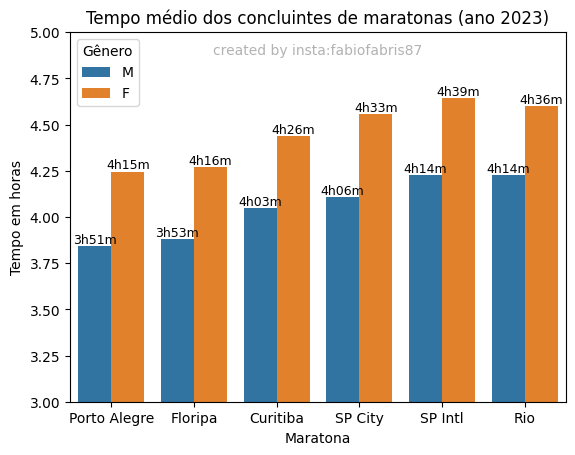

In [4]:
tmp_df = df.groupby(["maratona", "gender"])[["time_in_hours"]].agg("mean").reset_index().sort_values("time_in_hours")
ordering = tmp_df.index

ax = sns.barplot(tmp_df, x="maratona", y="time_in_hours", hue="gender", bottom=0)

ax.set_title("Tempo médio dos concluintes de maratonas (ano 2023)")
ax.set(ylabel='Tempo em horas', xlabel='Maratona')

ax.bar_label(ax.containers[0], fontsize=9, fmt=lambda x: str(int(x))+"h"+
                              "{:02.0f}m".format(60*(x-int(x))));
ax.bar_label(ax.containers[1], fontsize=9, fmt=lambda x: str(int(x))+"h"+
                              "{:02.0f}m".format(60*(x-int(x))));

ax.set(ylim=(3, 5))
ax.legend(title='Gênero', loc='upper left')#, labels=['F', 'M'])

ax.text(0.50, 0.95, 'created by insta:fabiofabris87', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0)

Text(0.5, 0.95, 'created by insta:fabiofabris87 para o @porfalaremcorrer')

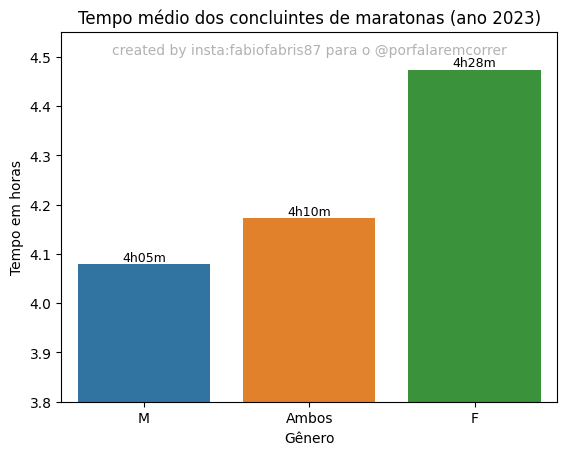

In [5]:
tmp_df = df.groupby(["gender"])[["time_in_hours"]].agg("mean").reset_index()

mean_time = df["time_in_hours"].mean()
tmp_df = pd.concat([tmp_df, pd.DataFrame([{"time_in_hours":mean_time, "gender":"Ambos"}])]).sort_values("time_in_hours")

ax = sns.barplot(tmp_df, x="gender", y="time_in_hours", bottom=0)

ax.set_title("Tempo médio dos concluintes de maratonas (ano 2023)")
ax.set(ylabel='Tempo em horas', xlabel='Gênero')

ax.bar_label(ax.containers[0], fontsize=9, fmt=lambda x: str(int(x))+"h"+
                              "{:02.0f}m".format(60*(x-int(x))));

ax.set(ylim=(3.8, 4.55))

ax.text(0.50, 0.95, 'created by insta:fabiofabris87 para o @porfalaremcorrer', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0)

Text(0.5, 0.95, 'created by insta:fabiofabris87')

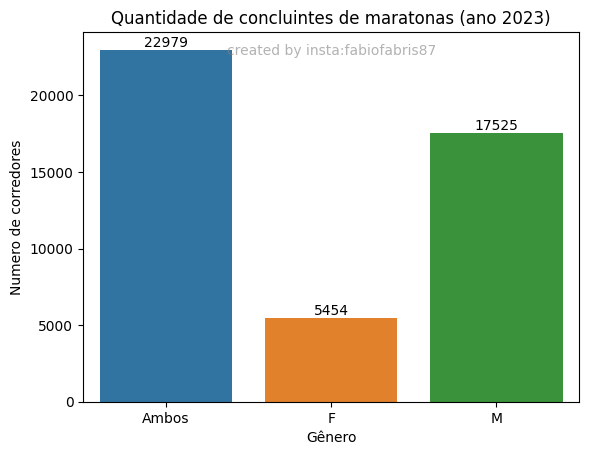

In [6]:
tmp_df = df.groupby(["gender"])[["time_in_hours"]].agg("count").reset_index()

mean_time = df["time_in_hours"].count()
tmp_df = pd.concat([tmp_df, pd.DataFrame([{"time_in_hours":mean_time, "gender":"Ambos"}])]).sort_values("gender")

ax = sns.barplot(tmp_df, x="gender", y="time_in_hours", bottom=0)

ax.set_title("Quantidade de concluintes de maratonas (ano 2023)")
ax.set(ylabel='Numero de corredores', xlabel='Gênero')

ax.bar_label(ax.containers[0]);

#ax.set(ylim=(3, 4.55))

ax.text(0.50, 0.95, 'created by insta:fabiofabris87', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0)

Text(0.5, 0.95, 'created by insta:fabiofabris87')

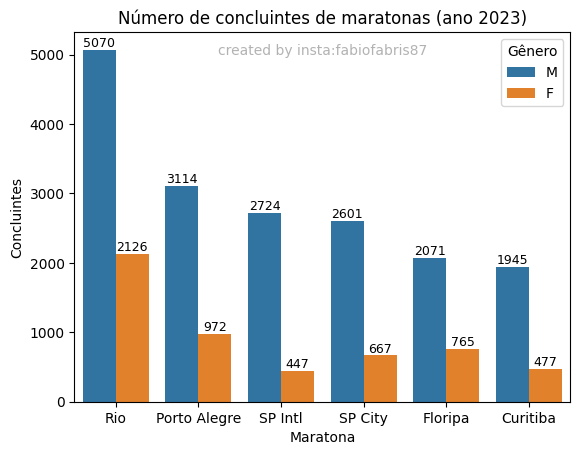

In [7]:
ax = sns.barplot(df.groupby(["maratona", "gender"])[["time"]].agg("count").reset_index().sort_values(["gender", "time"], ascending=[False, False]), x="maratona", y="time", hue="gender")
ax.set_title("Número de concluintes de maratonas (ano 2023)")
ax.set(ylabel='Concluintes', xlabel='Maratona')
ax.bar_label(ax.containers[0], fontsize=9);
ax.bar_label(ax.containers[1], fontsize=9);
ax.legend(title='Gênero', loc='upper right')#, labels=['F', 'M'])
ax.text(0.50, 0.95, 'created by insta:fabiofabris87', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0)

In [8]:
df["is_sub_4"] = (df["time_in_hours"] < 4).astype("int")*100
df["is_sub_3"] = (df["time_in_hours"] < 3).astype("int")*100
df["is_sub_3_n"] = (df["time_in_hours"] < 3).astype("int")
df["is_sub_4_n"] = (df["time_in_hours"] < 4).astype("int")

Text(0.5, 0.95, 'created by insta:fabiofabris87')

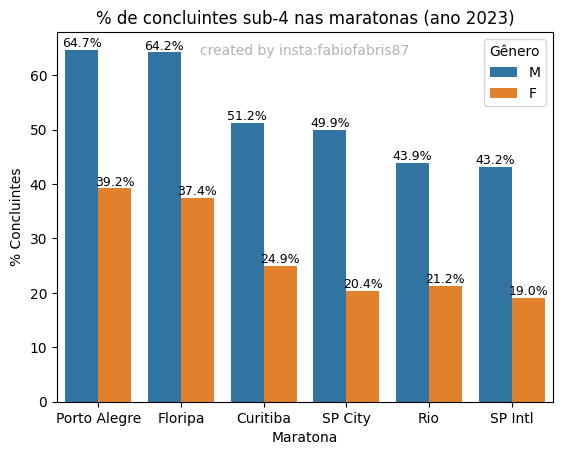

In [9]:
ax = sns.barplot(df.groupby(["maratona", "gender"])[["is_sub_4"]].agg("mean").reset_index().sort_values(["gender", "is_sub_4"], ascending=[False, False]), x="maratona", y="is_sub_4", hue="gender")
ax.set_title("% de concluintes sub-4 nas maratonas (ano 2023)")
ax.set(ylabel='% Concluintes', xlabel='Maratona')
ax.bar_label(ax.containers[0], fontsize=9, fmt=(lambda x : "{:0.1f}%".format(x)));
ax.bar_label(ax.containers[1], fontsize=9, fmt=(lambda x : "{:0.1f}%".format(x)));
ax.legend(title='Gênero', loc='upper right')#, labels=['F', 'M'])

ax.text(0.50, 0.95, 'created by insta:fabiofabris87', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0)

Text(0.5, 0.95, 'created by insta:fabiofabris87')

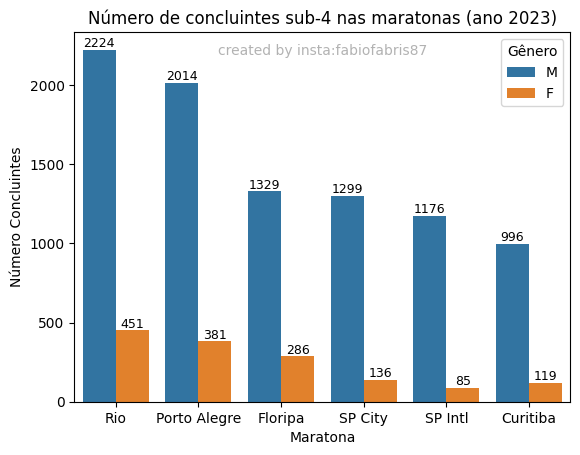

In [10]:
ax = sns.barplot(df.groupby(["maratona", "gender"])[["is_sub_4_n"]].agg("sum").reset_index().sort_values(["gender", "is_sub_4_n"], ascending=[False, False]), x="maratona", y="is_sub_4_n", hue="gender")
ax.set_title("Número de concluintes sub-4 nas maratonas (ano 2023)")
ax.set(ylabel='Número Concluintes', xlabel='Maratona')
ax.bar_label(ax.containers[0], fontsize=9);
ax.bar_label(ax.containers[1], fontsize=9);
ax.legend(title='Gênero', loc='upper right')#, labels=['F', 'M'])

ax.text(0.50, 0.95, 'created by insta:fabiofabris87', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0)

Text(0.5, 0.95, 'created by insta:fabiofabris87')

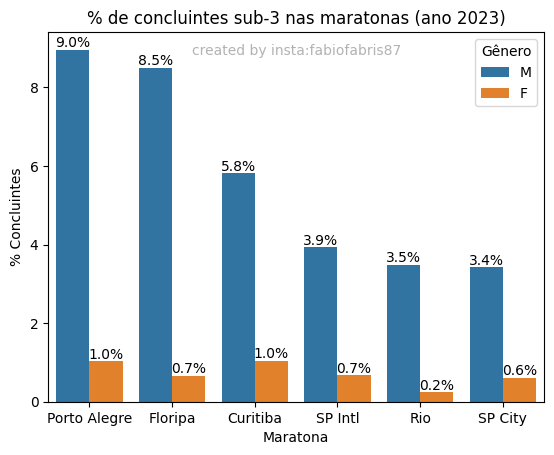

In [11]:
ax = sns.barplot(df.groupby(["maratona", "gender"])[["is_sub_3"]].agg("mean").reset_index().sort_values(["gender", "is_sub_3"], ascending=[False, False]), x="maratona", y="is_sub_3", hue="gender")
ax.set_title("% de concluintes sub-3 nas maratonas (ano 2023)")
ax.set(ylabel='% Concluintes', xlabel='Maratona')
ax.bar_label(ax.containers[0], fontsize=10, fmt=(lambda x : "{:0.1f}%".format(x)));
ax.bar_label(ax.containers[1], fontsize=10, fmt=(lambda x : "{:0.1f}%".format(x)));
ax.legend(title='Gênero', loc='upper right')#, labels=['F', 'M'])

ax.text(0.50, 0.95, 'created by insta:fabiofabris87', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0)

Text(0.5, 0.95, 'created by insta:fabiofabris87')

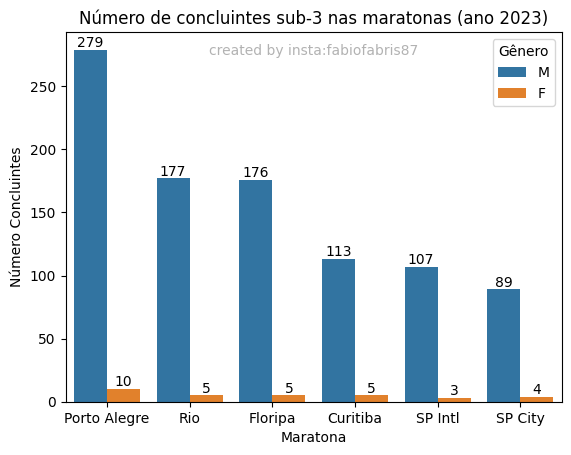

In [12]:
ax = sns.barplot(df.groupby(["maratona", "gender"])[["is_sub_3_n"]].agg("sum").reset_index().sort_values(["gender", "is_sub_3_n"], ascending=[False, False]), x="maratona", y="is_sub_3_n", hue="gender")
ax.set_title("Número de concluintes sub-3 nas maratonas (ano 2023)")
ax.set(ylabel='Número Concluintes', xlabel='Maratona')
ax.bar_label(ax.containers[0], fontsize=10);
ax.bar_label(ax.containers[1], fontsize=10);
ax.legend(title='Gênero', loc='upper right')#, labels=['F', 'M'])

ax.text(0.50, 0.95, 'created by insta:fabiofabris87', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0)

Text(0.5, 0.95, 'created by insta:fabiofabris87')

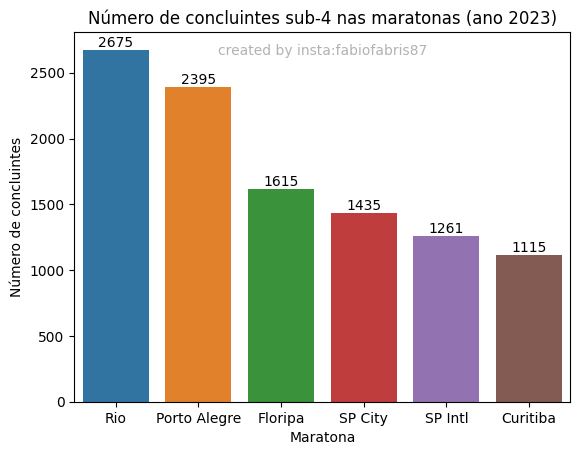

In [13]:

ax = sns.barplot(df.groupby(["maratona"])[["is_sub_4_n"]].agg("sum").reset_index().sort_values(["is_sub_4_n"], ascending=[False]), x="maratona", y="is_sub_4_n")
ax.set_title("Número de concluintes sub-4 nas maratonas (ano 2023)")
ax.set(ylabel='Número de concluintes', xlabel='Maratona')
ax.bar_label(ax.containers[0], fontsize=10);

ax.text(0.50, 0.95, 'created by insta:fabiofabris87', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0)

Text(0.5, 0.95, 'created by insta:fabiofabris87')

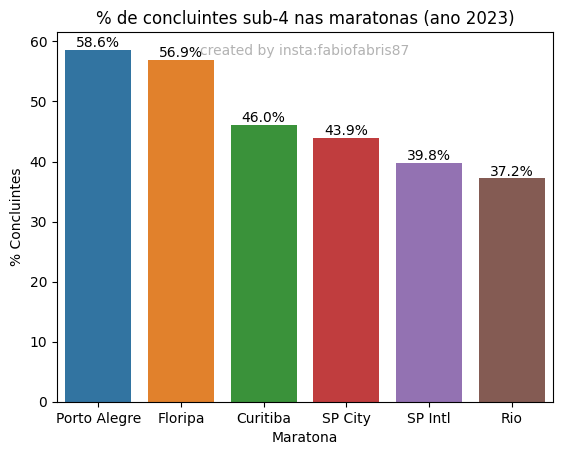

In [14]:
ax = sns.barplot(df.groupby(["maratona"])[["is_sub_4"]].agg("mean").reset_index().sort_values(["is_sub_4"], ascending=[False]), x="maratona", y="is_sub_4")
ax.set_title("% de concluintes sub-4 nas maratonas (ano 2023)")
ax.set(ylabel='% Concluintes', xlabel='Maratona')
ax.bar_label(ax.containers[0], fontsize=10, fmt=(lambda x : "{:0.1f}%".format(x)));

ax.text(0.50, 0.95, 'created by insta:fabiofabris87', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0)

Text(0.5, 0.95, 'created by insta:fabiofabris87')

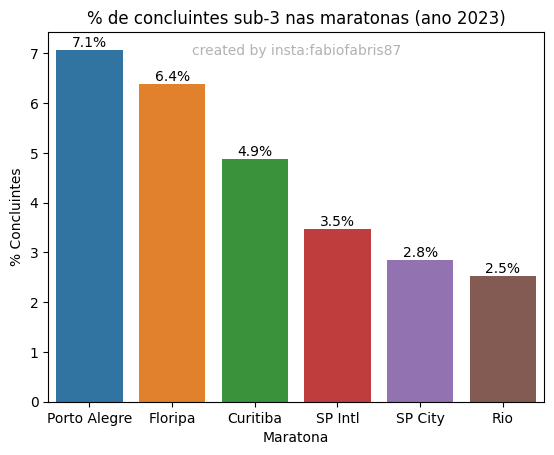

In [15]:
ax = sns.barplot(df.groupby(["maratona"])[["is_sub_3"]].agg("mean").reset_index().sort_values(["is_sub_3"], ascending=[False]), x="maratona", y="is_sub_3")
ax.set_title("% de concluintes sub-3 nas maratonas (ano 2023)")
ax.set(ylabel='% Concluintes', xlabel='Maratona')
ax.bar_label(ax.containers[0], fontsize=10, fmt=(lambda x : "{:0.1f}%".format(x)));

ax.text(0.50, 0.95, 'created by insta:fabiofabris87', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0)

Text(0.5, 0.95, 'created by insta:fabiofabris87')

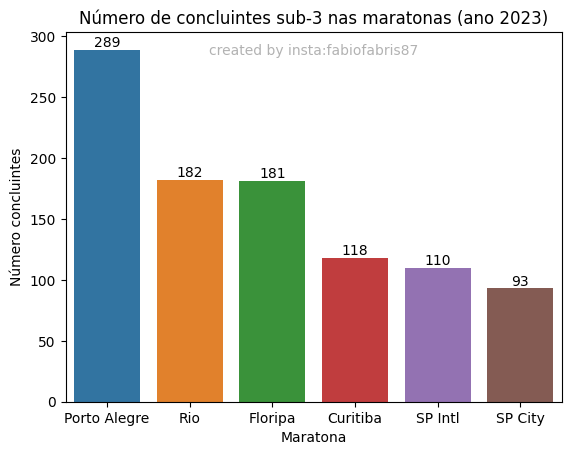

In [16]:
ax = sns.barplot(df.groupby(["maratona"])[["is_sub_3_n"]].agg("sum").reset_index().sort_values(["is_sub_3_n"], ascending=[False]), x="maratona", y="is_sub_3_n")
ax.set_title("Número de concluintes sub-3 nas maratonas (ano 2023)")
ax.set(ylabel='Número concluintes', xlabel='Maratona')
ax.bar_label(ax.containers[0], fontsize=10);

ax.text(0.50, 0.95, 'created by insta:fabiofabris87', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0)

Text(0.5, 0.95, 'created by insta:fabiofabris87')

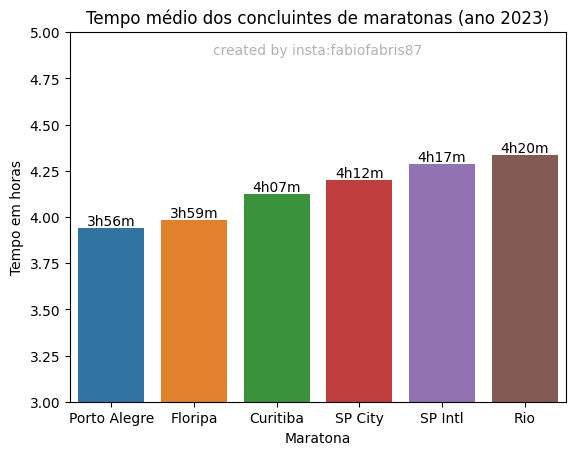

In [17]:
ax = sns.barplot(df.groupby(["maratona"])[["time_in_hours"]].agg("mean").reset_index().sort_values("time_in_hours"), 
                 x="maratona", y="time_in_hours", bottom=0)
ax.set_title("Tempo médio dos concluintes de maratonas (ano 2023)")
ax.set(ylabel='Tempo em horas', xlabel='Maratona')
ax.bar_label(ax.containers[0], fontsize=10, fmt=lambda x: str(int(x))+"h"+
                              "{:02.0f}m".format(60*(x-int(x))));
ax.set(ylim=(3, 5))

ax.text(0.50, 0.95, 'created by insta:fabiofabris87', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0)

Text(0.5, 0.95, 'created by insta:fabiofabris87')

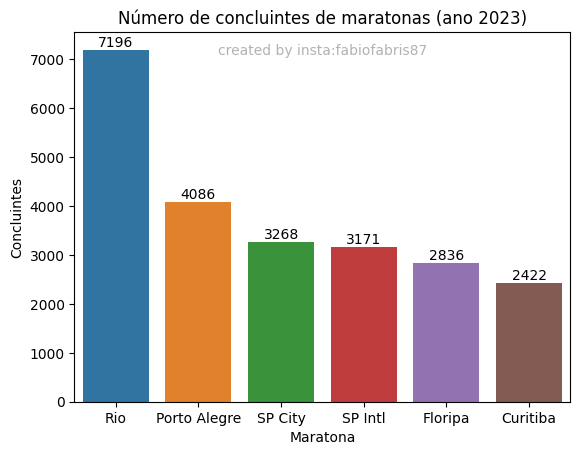

In [18]:
ax = sns.barplot(df.groupby("maratona")[["time"]].agg("count").reset_index().sort_values("time", ascending=False), x="maratona", y="time")
ax.set_title("Número de concluintes de maratonas (ano 2023)")
ax.bar_label(ax.containers[0], fontsize=10);
ax.set(ylabel='Concluintes', xlabel='Maratona')

ax.text(0.50, 0.95, 'created by insta:fabiofabris87', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0)

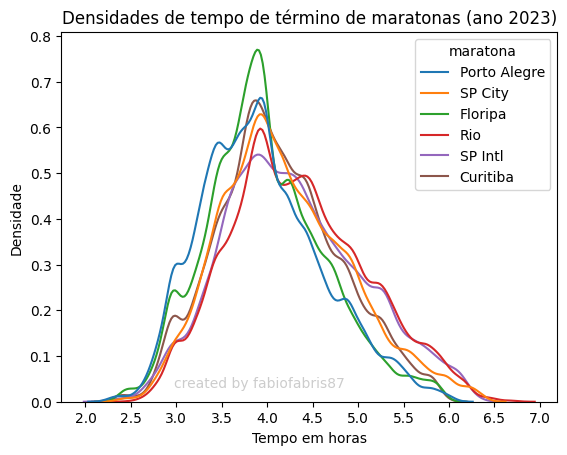

In [19]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt



ax = sns.kdeplot(df, x ="time_in_hours", bw_adjust = 0.6, hue="maratona", common_norm=False)

ax.set(ylabel='Densidade', xlabel='Tempo em horas')
ax.set_title("Densidades de tempo de término de maratonas (ano 2023)")

ax.text(0.40, 0.05, 'created by fabiofabris87', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.4,
        ha='center', va='center', rotation=0)


ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.show()


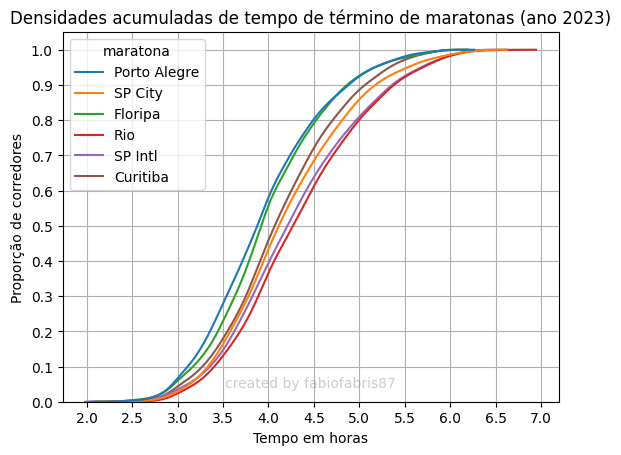

In [20]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt



ax = sns.kdeplot(df, x ="time_in_hours", bw_adjust = .6, hue="maratona", cumulative=True, common_norm=False)

ax.set(ylabel='Proporção de corredores', xlabel='Tempo em horas')
ax.set_title("Densidades acumuladas de tempo de término de maratonas (ano 2023)")


ax.text(0.50, 0.05, 'created by fabiofabris87', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.4,
        ha='center', va='center', rotation=0)

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.grid()
plt.show()
# ax.axvline(x = 3*60*60, color = "black", linestyle = "dashed")
# ax.axvline(x = 3*60*60 + 30*60, color = "black", linestyle = "dashed")
# ax.axvline(x = 4*60*60, color = "black", linestyle = "dashed")

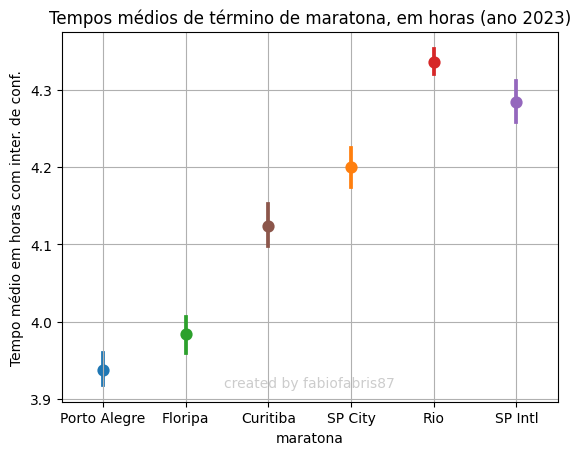

In [21]:
order = ['Porto Alegre', 'Floripa', 'Curitiba', "SP City", "Rio", "SP Intl"]
ax = sns.pointplot(df, x = "maratona", y ="time_in_hours", hue = "maratona", order=order)
ax.set_title("Tempos médios de término de maratona, em horas (ano 2023)")
ax.set(ylabel='Tempo médio em horas com inter. de conf.')
plt.legend([],[], frameon=False)

ax.text(0.50, 0.05, 'created by fabiofabris87', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.4,
        ha='center', va='center', rotation=0)


plt.grid()
plt.show()

In [22]:
df["mean_time_hours"] = df.groupby('name')["time_in_hours"].transform("mean")
df["count"] = df.groupby('name')["time"].transform("count")

# Corredores que correram mais "Majors brasileiras" em 2023

In [23]:
pd.set_option('display.min_rows', 50)
df.sort_values(["count", "name"], ascending=False)

,name,time,gender,age,maratona,time_in_seconds,time_in_hours,time_timestamp,is_sub_4,is_sub_3,is_sub_3_n,is_sub_4_n,mean_time_hours,count
314,JOSE MARIA DE BRITO CORREA JUNIOR,3:01:26,M,40.0,Porto Alegre,10886,3.023889,1900-01-01 03:01:26,100,0,0,1,3.461898,6
850,JOSE MARIA DE BRITO CORREA JUNIOR,3:42:09,M,40.0,SP City,13329,3.702500,1900-01-01 03:42:09,100,0,0,1,3.461898,6
533,JOSE MARIA DE BRITO CORREA JUNIOR,3:25:30,M,40.0,Floripa,12330,3.425000,1900-01-01 03:25:30,100,0,0,1,3.461898,6
440,JOSE MARIA DE BRITO CORREA JUNIOR,03:15:10,M,42.0,Rio,11710,3.252778,1900-01-01 03:15:10,100,0,0,1,3.461898,6
2555,JOSE MARIA DE BRITO CORREA JUNIOR,03:47:55,M,42.0,SP Intl,13675,3.798611,1900-01-01 03:47:55,100,0,0,1,3.461898,6
505,JOSE MARIA DE BRITO CORREA JUNIOR,03:34:07,M,42.0,Curitiba,12847,3.568611,1900-01-01 03:34:07,100,0,0,1,3.461898,6
2438,ALEXANDRE DE ARAUJO SILVA,4:00:46,M,40.0,Porto Alegre,14446,4.012778,1900-01-01 04:00:46,0,0,0,0,3.938750,6
1468,ALEXANDRE DE ARAUJO SILVA,4:01:06,M,40.0,SP City,14466,4.018333,1900-01-01 04:01:06,0,0,0,0,3.938750,6
1522,ALEXANDRE DE ARAUJO SILVA,3:57:45,M,40.0,Floripa,14265,3.962500,1900-01-01 03:57:45,100,0,0,1,3.938750,6
2512,ALEXANDRE DE ARAUJO SILVA,03:57:58,F,44.0,Rio,14278,3.966111,1900-01-01 03:57:58,100,0,0,1,3.938750,6


In [24]:
import upsetplot
from upsetplot import from_indicators, plot, from_memberships 

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

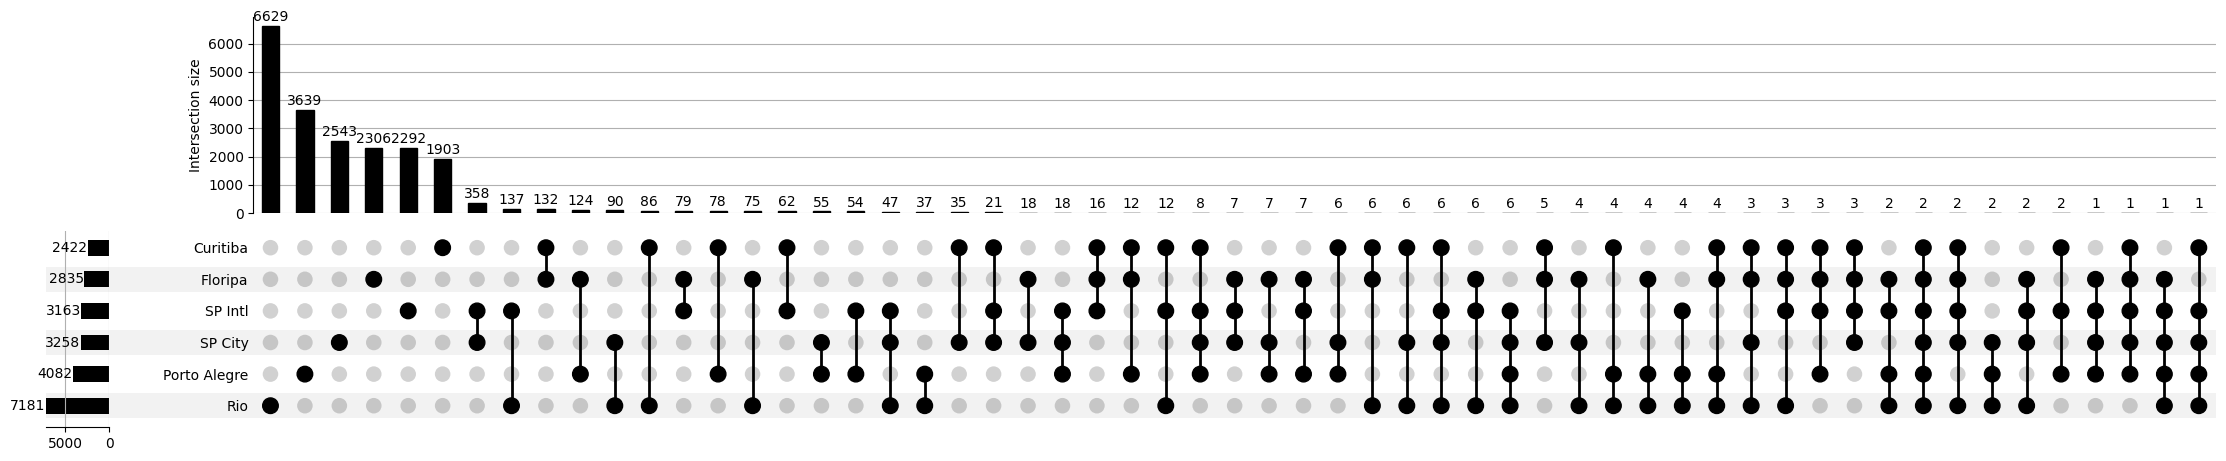

In [25]:
membership_data = list(df.groupby("name")["maratona"].apply(list).values)
membership_data_formatted = from_memberships(membership_data)
plot(membership_data_formatted, subset_size="count", sort_by="cardinality", show_counts=True)

Text(0.5, 0.95, 'created by insta:fabiofabris87')

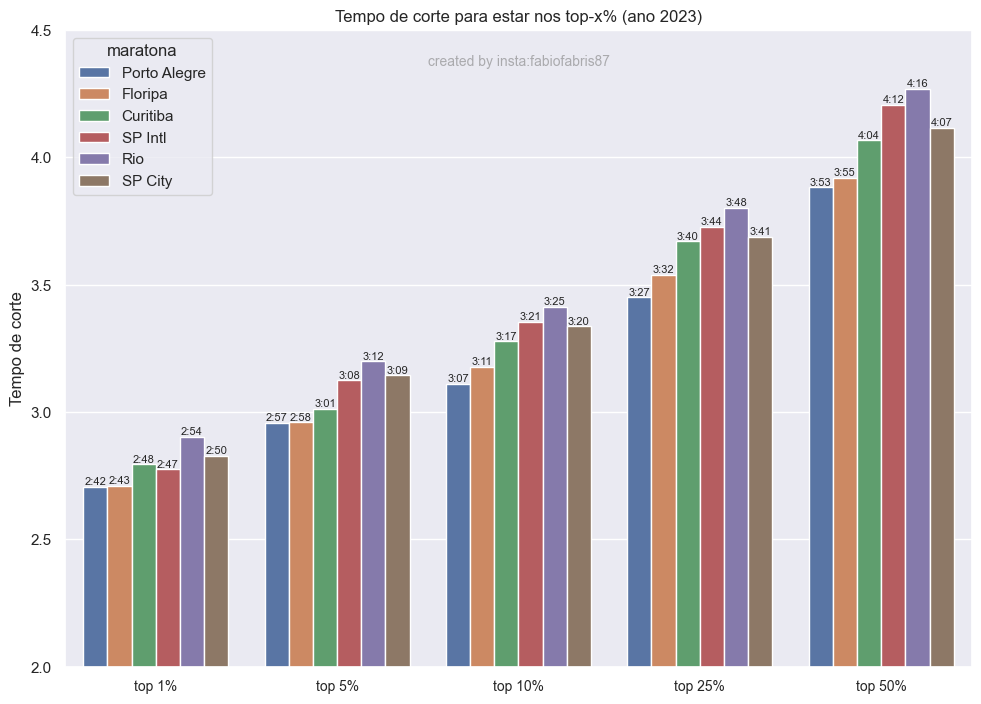

In [26]:
import numpy as np 

sns.set(rc={'figure.figsize':(11.7,8.27)})

tmp_df = df.groupby("maratona").agg(
    percentile_01 = ("time_in_hours", lambda x: np.percentile(x, 1)),
    percentile_05 = ("time_in_hours", lambda x: np.percentile(x, 5)),
    percentile_10 = ("time_in_hours", lambda x: np.percentile(x, 10)),
    percentile_25 = ("time_in_hours", lambda x: np.percentile(x, 25)),
    percentile_50 = ("time_in_hours", lambda x: np.percentile(x, 50)),
).reset_index()

tmp_df = pd.melt(tmp_df, id_vars=["maratona"], value_vars=["percentile_01", "percentile_05", "percentile_10", "percentile_25", "percentile_50"])

def sorting_mara(x):
    d = {"Porto Alegre":0, "Curitiba":2, "Rio":4, "SP Intl":3, "SP City":5, "Floripa":1}
    try:
        return tmp_df.maratona.apply(lambda x: d[x])
    except:
        return x

ax = sns.barplot(tmp_df.sort_values(["variable", "maratona"], ascending=[True,True], key=sorting_mara), x="variable", y="value", hue="maratona")

ax.set(ylim=(2, 4.5))
ax.set_title("Tempo de corte para estar nos top-x% (ano 2023)")
ax.set(ylabel='Tempo de corte', xlabel='')
ax.bar_label(ax.containers[0], fontsize=8, fmt=lambda x: str(int(x))+":{:02.0f}".format(60*(x-int(x))));
ax.bar_label(ax.containers[1], fontsize=8, fmt=lambda x: str(int(x))+":{:02.0f}".format(60*(x-int(x))));
ax.bar_label(ax.containers[2], fontsize=8, fmt=lambda x: str(int(x))+":{:02.0f}".format(60*(x-int(x))));
ax.bar_label(ax.containers[3], fontsize=8, fmt=lambda x: str(int(x))+":{:02.0f}".format(60*(x-int(x))));
ax.bar_label(ax.containers[4], fontsize=8, fmt=lambda x: str(int(x))+":{:02.0f}".format(60*(x-int(x))));
ax.bar_label(ax.containers[5], fontsize=8, fmt=lambda x: str(int(x))+":{:02.0f}".format(60*(x-int(x))));
ax.set_xticklabels(['top 1%', 'top 5%', "top 10%", 'top 25%', "top 50%"], rotation='horizontal', fontsize=10)
ax.text(0.50, 0.95, 'created by insta:fabiofabris87', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0)

Text(0.5, 0.95, 'created by insta:fabiofabris87')

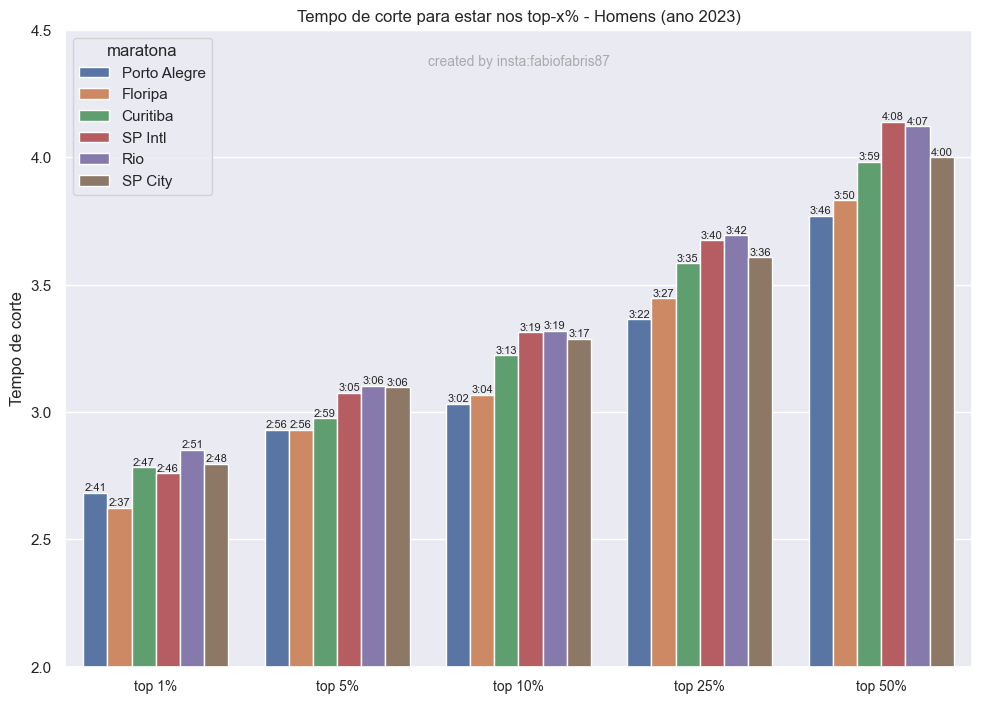

In [27]:
import numpy as np 

sns.set(rc={'figure.figsize':(11.7,8.27)})

tmp_df = df[df.gender == "M"].groupby("maratona").agg(
    percentile_01 = ("time_in_hours", lambda x: np.percentile(x, 1)),
    percentile_05 = ("time_in_hours", lambda x: np.percentile(x, 5)),
    percentile_10 = ("time_in_hours", lambda x: np.percentile(x, 10)),
    percentile_25 = ("time_in_hours", lambda x: np.percentile(x, 25)),
    percentile_50 = ("time_in_hours", lambda x: np.percentile(x, 50)),
).reset_index()

tmp_df = pd.melt(tmp_df, id_vars=["maratona"], value_vars=["percentile_01", "percentile_05", "percentile_10", "percentile_25", "percentile_50"])


ax = sns.barplot(tmp_df.sort_values(["variable", "maratona"], ascending=[True,True], key=sorting_mara), x="variable", y="value", hue="maratona")

ax.set(ylim=(2, 4.5))
ax.set_title("Tempo de corte para estar nos top-x% - Homens (ano 2023)")
ax.set(ylabel='Tempo de corte', xlabel='')
ax.bar_label(ax.containers[0], fontsize=8, fmt=lambda x: str(int(x))+":{:02.0f}".format(60*(x-int(x))));
ax.bar_label(ax.containers[1], fontsize=8, fmt=lambda x: str(int(x))+":{:02.0f}".format(60*(x-int(x))));
ax.bar_label(ax.containers[2], fontsize=8, fmt=lambda x: str(int(x))+":{:02.0f}".format(60*(x-int(x))));
ax.bar_label(ax.containers[3], fontsize=8, fmt=lambda x: str(int(x))+":{:02.0f}".format(60*(x-int(x))));
ax.bar_label(ax.containers[4], fontsize=8, fmt=lambda x: str(int(x))+":{:02.0f}".format(60*(x-int(x))));
ax.bar_label(ax.containers[5], fontsize=8, fmt=lambda x: str(int(x))+":{:02.0f}".format(60*(x-int(x))));
ax.set_xticklabels(['top 1%', 'top 5%', "top 10%", 'top 25%', "top 50%"], rotation='horizontal', fontsize=10)
ax.text(0.50, 0.95, 'created by insta:fabiofabris87', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0)

Text(0.5, 0.95, 'created by insta:fabiofabris87')

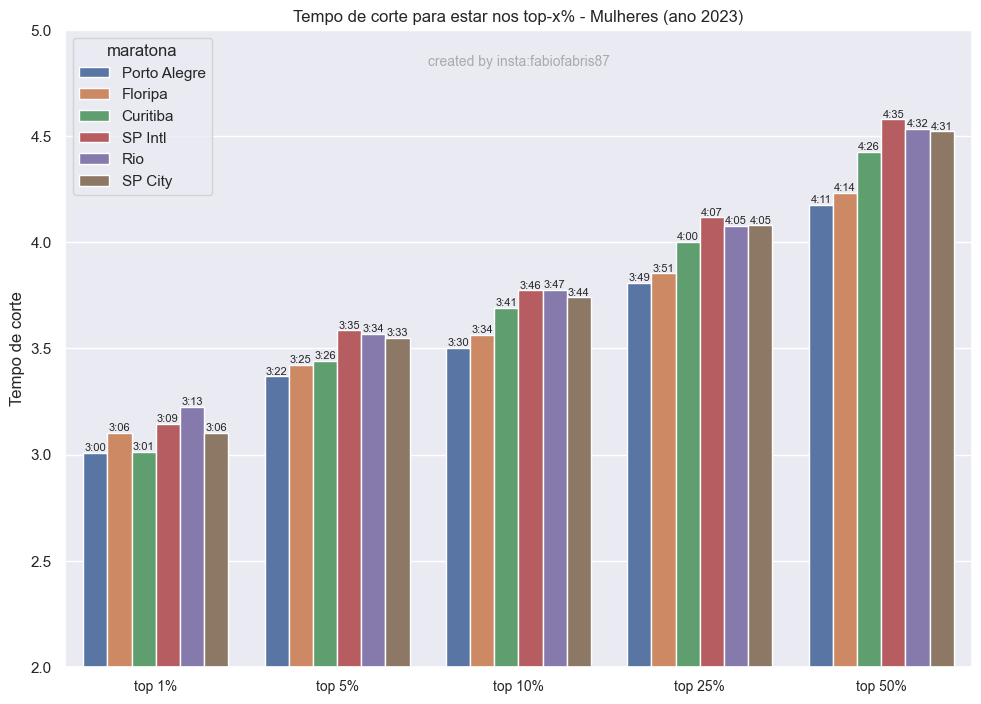

In [28]:
import numpy as np 

sns.set(rc={'figure.figsize':(11.7,8.27)})

tmp_df = df[df.gender == "F"].groupby("maratona").agg(
    percentile_01 = ("time_in_hours", lambda x: np.percentile(x, 1)),
    percentile_05 = ("time_in_hours", lambda x: np.percentile(x, 5)),
    percentile_10 = ("time_in_hours", lambda x: np.percentile(x, 10)),
    percentile_25 = ("time_in_hours", lambda x: np.percentile(x, 25)),
    percentile_50 = ("time_in_hours", lambda x: np.percentile(x, 50)),
).reset_index()

tmp_df = pd.melt(tmp_df, id_vars=["maratona"], value_vars=["percentile_01", "percentile_05", "percentile_10", "percentile_25", "percentile_50"])

ax = sns.barplot(tmp_df.sort_values(["variable", "maratona"], ascending=[True,True], key=sorting_mara), x="variable", y="value", hue="maratona")

ax.set(ylim=(2, 5))
ax.set_title("Tempo de corte para estar nos top-x% - Mulheres (ano 2023)")
ax.set(ylabel='Tempo de corte', xlabel='')
ax.bar_label(ax.containers[0], fontsize=8, fmt=lambda x: str(int(x))+":{:02.0f}".format(60*(x-int(x))));
ax.bar_label(ax.containers[1], fontsize=8, fmt=lambda x: str(int(x))+":{:02.0f}".format(60*(x-int(x))));
ax.bar_label(ax.containers[2], fontsize=8, fmt=lambda x: str(int(x))+":{:02.0f}".format(60*(x-int(x))));
ax.bar_label(ax.containers[3], fontsize=8, fmt=lambda x: str(int(x))+":{:02.0f}".format(60*(x-int(x))));
ax.bar_label(ax.containers[4], fontsize=8, fmt=lambda x: str(int(x))+":{:02.0f}".format(60*(x-int(x))));
ax.bar_label(ax.containers[5], fontsize=8, fmt=lambda x: str(int(x))+":{:02.0f}".format(60*(x-int(x))));
ax.set_xticklabels(['top 1%', 'top 5%', "top 10%", 'top 25%', "top 50%"], rotation='horizontal', fontsize=10)
ax.text(0.50, 0.95, 'created by insta:fabiofabris87', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0)

Text(0.5, 0.95, 'created by insta:fabiofabris87')

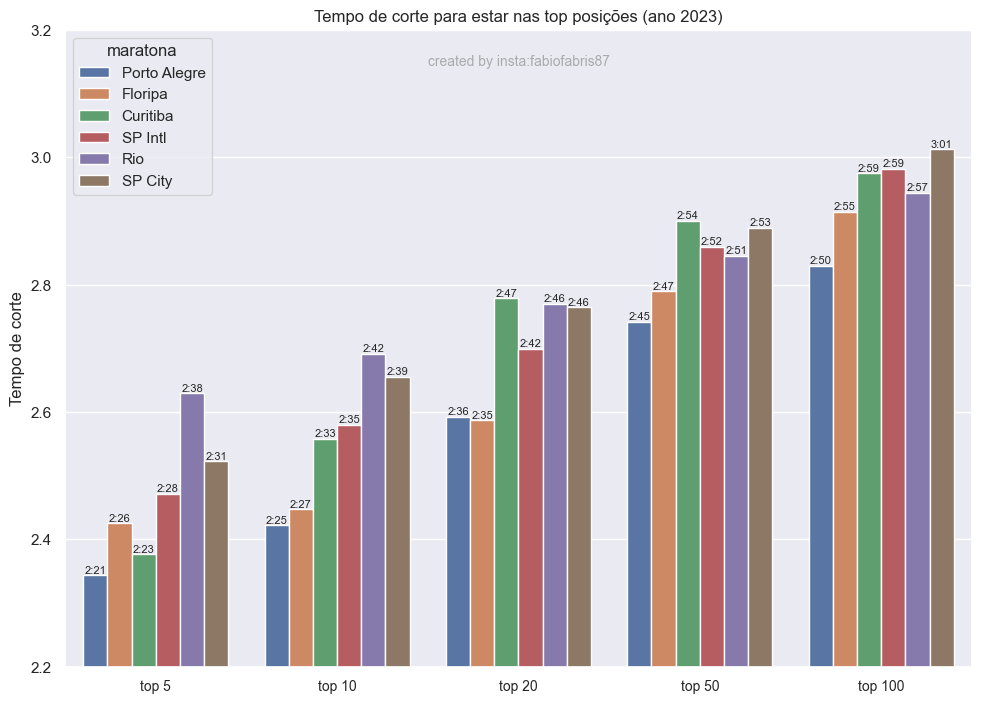

In [29]:
import numpy as np 

tmp_df = df.groupby("maratona").agg(
    top5_time_cut = ("time_in_hours", lambda x: x.nsmallest(n=5).iloc[4]),
    top10_time_cut = ("time_in_hours", lambda x: x.nsmallest(n=10).iloc[9]),
    top20_time_cut = ("time_in_hours", lambda x: x.nsmallest(n=20).iloc[19]),
    top50_time_cut = ("time_in_hours", lambda x: x.nsmallest(n=50).iloc[49]),
    top100_time_cut = ("time_in_hours", lambda x: x.nsmallest(n=100).iloc[99]),
).reset_index().sort_values(["maratona"])

tmp_df = pd.melt(tmp_df, id_vars=["maratona"], value_vars=["top5_time_cut", "top10_time_cut", "top20_time_cut", "top50_time_cut", "top100_time_cut"])

ax = sns.barplot(tmp_df.sort_values(["variable", "maratona"], ascending=[True,True], key=sorting_mara), x="variable", y="value", hue="maratona")

ax.set(ylim=(2.2, 3.2))
ax.set_title("Tempo de corte para estar nas top posições (ano 2023)")
ax.set(ylabel='Tempo de corte', xlabel='')
ax.bar_label(ax.containers[0], fontsize=8, fmt=lambda x: str(int(x))+":{:02.0f}".format(60*(x-int(x))));
ax.bar_label(ax.containers[1], fontsize=8, fmt=lambda x: str(int(x))+":{:02.0f}".format(60*(x-int(x))));
ax.bar_label(ax.containers[2], fontsize=8, fmt=lambda x: str(int(x))+":{:02.0f}".format(60*(x-int(x))));
ax.bar_label(ax.containers[3], fontsize=8, fmt=lambda x: str(int(x))+":{:02.0f}".format(60*(x-int(x))));
ax.bar_label(ax.containers[4], fontsize=8, fmt=lambda x: str(int(x))+":{:02.0f}".format(60*(x-int(x))));
ax.bar_label(ax.containers[5], fontsize=8, fmt=lambda x: str(int(x))+":{:02.0f}".format(60*(x-int(x))));
ax.set_xticklabels(['top 5', 'top 10', "top 20", 'top 50', "top 100"], rotation='horizontal', fontsize=10)
ax.text(0.50, 0.95, 'created by insta:fabiofabris87', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0)

Text(0.5, 0.95, 'created by insta:fabiofabris87')

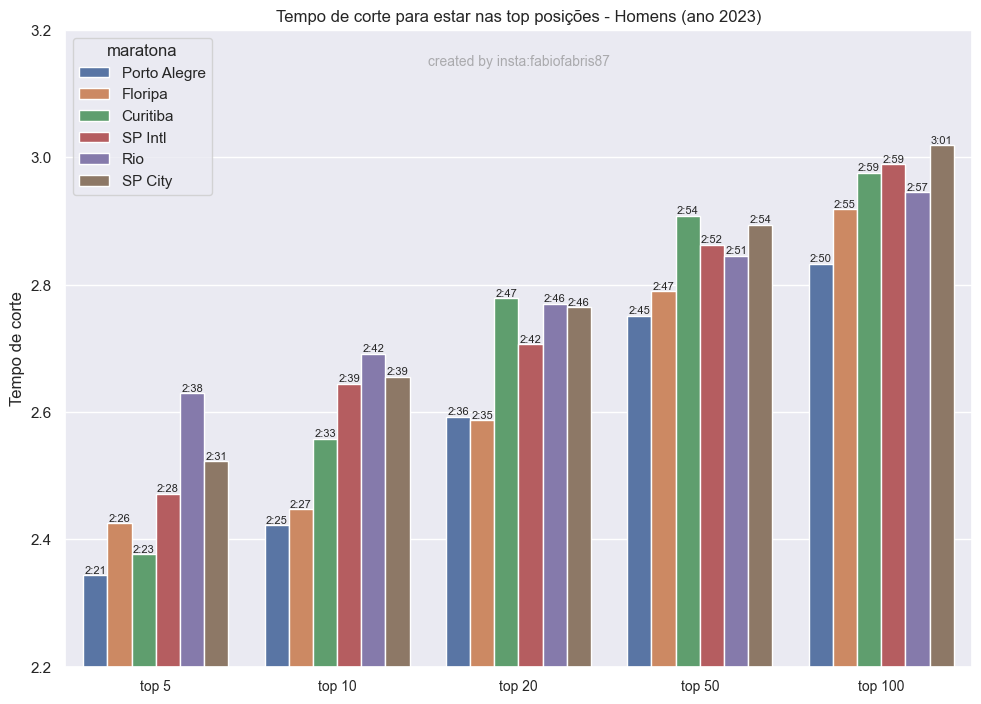

In [30]:
import numpy as np 

tmp_df = df[df.gender == "M"].groupby("maratona").agg(
    top5_time_cut = ("time_in_hours", lambda x: x.nsmallest(n=5).iloc[4]),
    top10_time_cut = ("time_in_hours", lambda x: x.nsmallest(n=10).iloc[9]),
    top20_time_cut = ("time_in_hours", lambda x: x.nsmallest(n=20).iloc[19]),
    top50_time_cut = ("time_in_hours", lambda x: x.nsmallest(n=50).iloc[49]),
    top100_time_cut = ("time_in_hours", lambda x: x.nsmallest(n=100).iloc[99]),
).reset_index().sort_values(["maratona"])

tmp_df = pd.melt(tmp_df, id_vars=["maratona"], value_vars=["top5_time_cut", "top10_time_cut", "top20_time_cut", "top50_time_cut", "top100_time_cut"])

ax = sns.barplot(tmp_df.sort_values(["variable", "maratona"], ascending=[True,True], key=sorting_mara), x="variable", y="value", hue="maratona")

ax.set(ylim=(2.2, 3.2))
ax.set_title("Tempo de corte para estar nas top posições - Homens (ano 2023)")
ax.set(ylabel='Tempo de corte', xlabel='')
ax.bar_label(ax.containers[0], fontsize=8, fmt=lambda x: str(int(x))+":{:02.0f}".format(60*(x-int(x))));
ax.bar_label(ax.containers[1], fontsize=8, fmt=lambda x: str(int(x))+":{:02.0f}".format(60*(x-int(x))));
ax.bar_label(ax.containers[2], fontsize=8, fmt=lambda x: str(int(x))+":{:02.0f}".format(60*(x-int(x))));
ax.bar_label(ax.containers[3], fontsize=8, fmt=lambda x: str(int(x))+":{:02.0f}".format(60*(x-int(x))));
ax.bar_label(ax.containers[4], fontsize=8, fmt=lambda x: str(int(x))+":{:02.0f}".format(60*(x-int(x))));
ax.bar_label(ax.containers[5], fontsize=8, fmt=lambda x: str(int(x))+":{:02.0f}".format(60*(x-int(x))));
ax.set_xticklabels(['top 5', 'top 10', "top 20", 'top 50', "top 100"], rotation='horizontal', fontsize=10)
ax.text(0.50, 0.95, 'created by insta:fabiofabris87', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0)

Text(0.5, 0.95, 'created by insta:fabiofabris87')

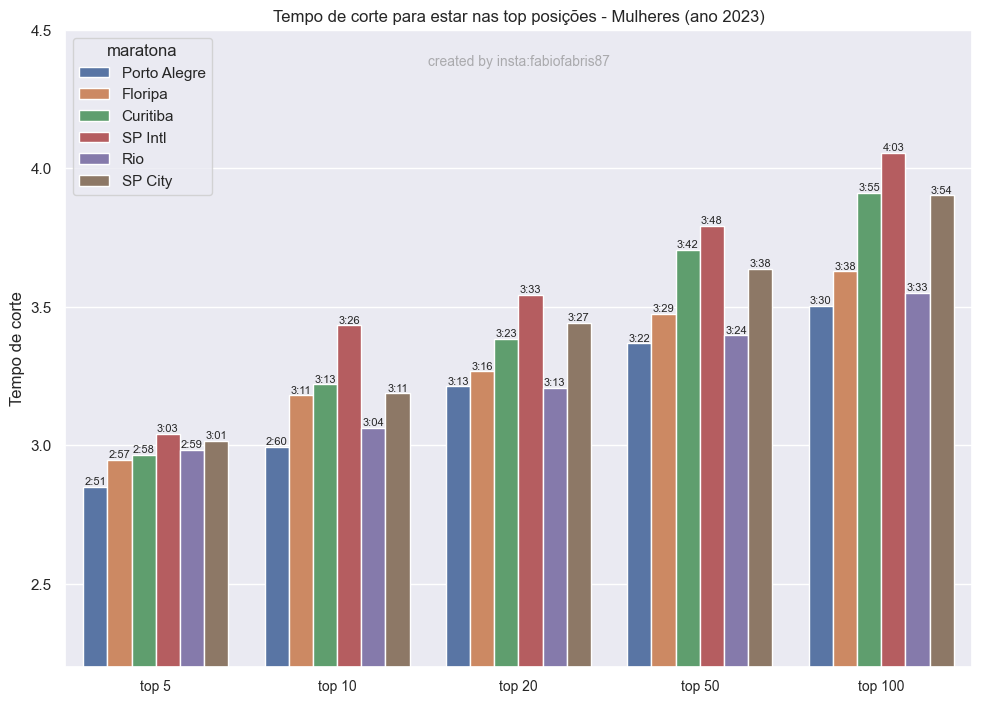

In [31]:
import numpy as np 

tmp_df = df[df.gender == "F"].groupby("maratona").agg(
    top5_time_cut = ("time_in_hours", lambda x: x.nsmallest(n=5).iloc[4]),
    top10_time_cut = ("time_in_hours", lambda x: x.nsmallest(n=10).iloc[9]),
    top20_time_cut = ("time_in_hours", lambda x: x.nsmallest(n=20).iloc[19]),
    top50_time_cut = ("time_in_hours", lambda x: x.nsmallest(n=50).iloc[49]),
    top100_time_cut = ("time_in_hours", lambda x: x.nsmallest(n=100).iloc[99]),
).reset_index().sort_values(["maratona"])

tmp_df = pd.melt(tmp_df, id_vars=["maratona"], value_vars=["top5_time_cut", "top10_time_cut", "top20_time_cut", "top50_time_cut", "top100_time_cut"])

ax = sns.barplot(tmp_df.sort_values(["variable", "maratona"], ascending=[True,True], key=sorting_mara), x="variable", y="value", hue="maratona")

ax.set(ylim=(2.2, 4.5))
ax.set_title("Tempo de corte para estar nas top posições - Mulheres (ano 2023)")
ax.set(ylabel='Tempo de corte', xlabel='')
ax.bar_label(ax.containers[0], fontsize=8, fmt=lambda x: str(int(x))+":{:02.0f}".format(60*(x-int(x))));
ax.bar_label(ax.containers[1], fontsize=8, fmt=lambda x: str(int(x))+":{:02.0f}".format(60*(x-int(x))));
ax.bar_label(ax.containers[2], fontsize=8, fmt=lambda x: str(int(x))+":{:02.0f}".format(60*(x-int(x))));
ax.bar_label(ax.containers[3], fontsize=8, fmt=lambda x: str(int(x))+":{:02.0f}".format(60*(x-int(x))));
ax.bar_label(ax.containers[4], fontsize=8, fmt=lambda x: str(int(x))+":{:02.0f}".format(60*(x-int(x))));
ax.bar_label(ax.containers[5], fontsize=8, fmt=lambda x: str(int(x))+":{:02.0f}".format(60*(x-int(x))));
ax.set_xticklabels(['top 5', 'top 10', "top 20", 'top 50', "top 100"], rotation='horizontal', fontsize=10)
ax.text(0.50, 0.95, 'created by insta:fabiofabris87', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0)

In [32]:
def get_age_cat(x):
    age = x.age
    if(age>=15 and age<=19):
        return "(15,19)"
    if(age>=20 and age<=24):
        return "(20,24)"
    if(age>=25 and age<=29):
        return "(25,29)"
    if(age>=30 and age<=34):
        return "(30,34)"
    if(age>=35 and age<=39):
        return "(35,39)"
    if(age>=40 and age<=44):
        return "(40,44)"
    if(age>=45 and age<=49):
        return "(45,49)"
    if(age>=50 and age<=54):
        return "(50,54)"
    if(age>=55 and age<=59):
        return "(55,59)"
    if(age>=60 and age<=64):
        return "(60,64)"
    if(age>=65 and age<=69):
        return "(65,69)"
    if(age>=70 and age<=74):
        return "(70,74)"
    if(age>=75 and age<=79):
        return "(75,79)"
    if(age>=80):
        return "(80,)"
    
def get_age_cat_boston(x):
    age = x.age
    if(age>=18 and age<=34):
        return "(18,34)"
    if(age>=35 and age<=39):
        return "(35,39)"
    if(age>=40 and age<=44):
        return "(40,44)"
    if(age>=45 and age<=49):
        return "(45,49)"
    if(age>=50 and age<=54):
        return "(50,54)"
    if(age>=55 and age<=59):
        return "(55,59)"
    if(age>=60 and age<=64):
        return "(60,64)"
    if(age>=65 and age<=69):
        return "(65,69)"
    if(age>=70 and age<=74):
        return "(70,74)"
    if(age>=75 and age<=79):
        return "(75,79)"
    if(age>=80):
        return "(80,)"

def get_boston_cutoff(x):
    gender = x.gender
    age_cat = x.age_cat
    if(gender == "M"):
        if(age_cat=="(18,34)"):
            return 3.0
        if(age_cat=="(35,39)"):
            return 3.0 + 5/60
        if(age_cat=="(40,44)"):
            return 3.0 + 10/60
        if(age_cat=="(45,49)"):
            return 3.0 + 20/60
        if(age_cat=="(50,54)"):
            return 3.0 + 20/60 
        if(age_cat=="(55,59)"):
            return 3.0 + 25/60
        if(age_cat=="(60,64)"):
            return 3.0 + 35/60
        if(age_cat=="(65,69)"):
            return 4.0 + 5/60
        if(age_cat=="(70,74)"):
            return 4.0 + 20/60
        if(age_cat=="(75,79)"):
            return 4.0 + 35/60
        if(age_cat=="(80,)"):
            return 4.0 + 50/60
    elif(gender == "F"):
        if(age_cat=="(18,34)"):
            return 3.0 + 30/60
        if(age_cat=="(35,39)"):
            return 3.0 + 35/60
        if(age_cat=="(40,44)"):
            return 3.0 + 40/60
        if(age_cat=="(45,49)"):
            return 3.0 + 50/60
        if(age_cat=="(50,54)"):
            return 3.0 + 55/60 
        if(age_cat=="(55,59)"):
            return 4.0 + 5/60
        if(age_cat=="(60,64)"):
            return 4.0 + 20/60
        if(age_cat=="(65,69)"):
            return 4.0 + 35/60
        if(age_cat=="(70,74)"):
            return 4.0 + 50/60
        if(age_cat=="(75,79)"):
            return 5.0 + 5/60
        if(age_cat=="(80,)"):
            return 5.0 + 20/60

In [33]:
df["age_cat"] = df.apply(get_age_cat_boston, axis=1)
df["age_cat_2"] = df.apply(get_age_cat, axis=1)
df["boston_cutoff"] = df.apply(get_boston_cutoff, axis=1)
df["boston_qualified"] = (df["time_in_hours"] < df["boston_cutoff"]).astype(int)

Text(0.5, 0.95, 'criado por insta:fabiofabris87 para o @porfalaremcorrer')

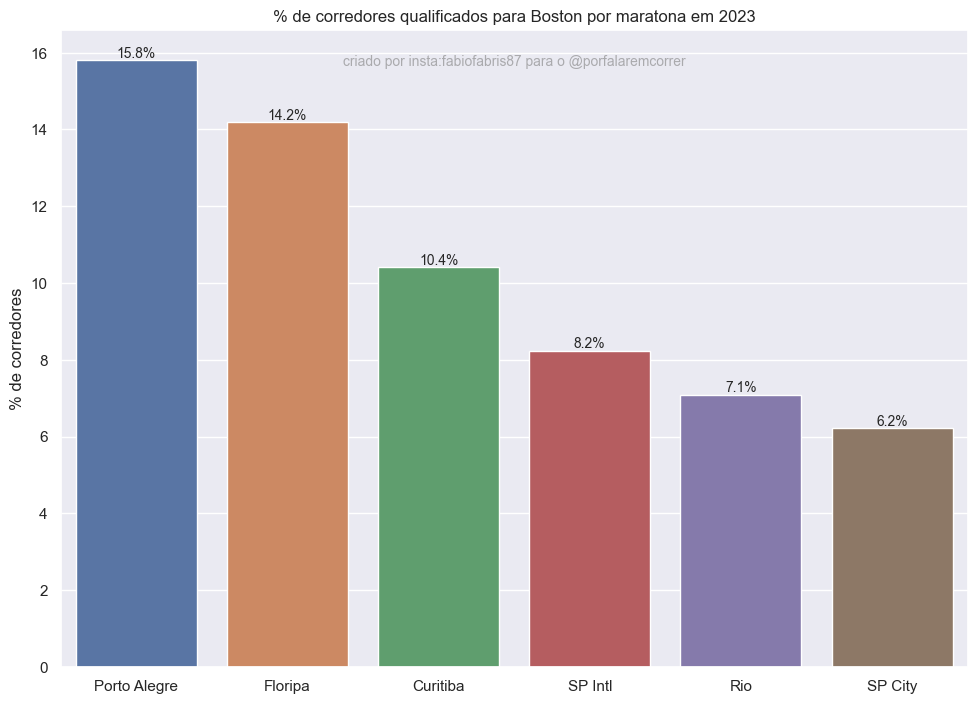

In [34]:
tmp_df = df[df["boston_cutoff"].notna()].groupby("maratona").agg({"boston_qualified":"mean"}).reset_index()
tmp_df["boston_qualified"] = tmp_df["boston_qualified"]*100

ax = sns.barplot(data=tmp_df.sort_values(["maratona"], ascending=[True], key=sorting_mara), x="maratona", y="boston_qualified")

ax.set_title("% de corredores qualificados para Boston por maratona em 2023")
ax.set(ylabel='% de corredores', xlabel='')
ax.bar_label(ax.containers[0], fontsize=10, fmt=lambda x: "{:02.1f}%".format(x));

ax.text(0.50, 0.95, 'criado por insta:fabiofabris87 para o @porfalaremcorrer', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0)

Text(0.5, 0.95, 'criado por insta:fabiofabris87 para o @porfalaremcorrer')

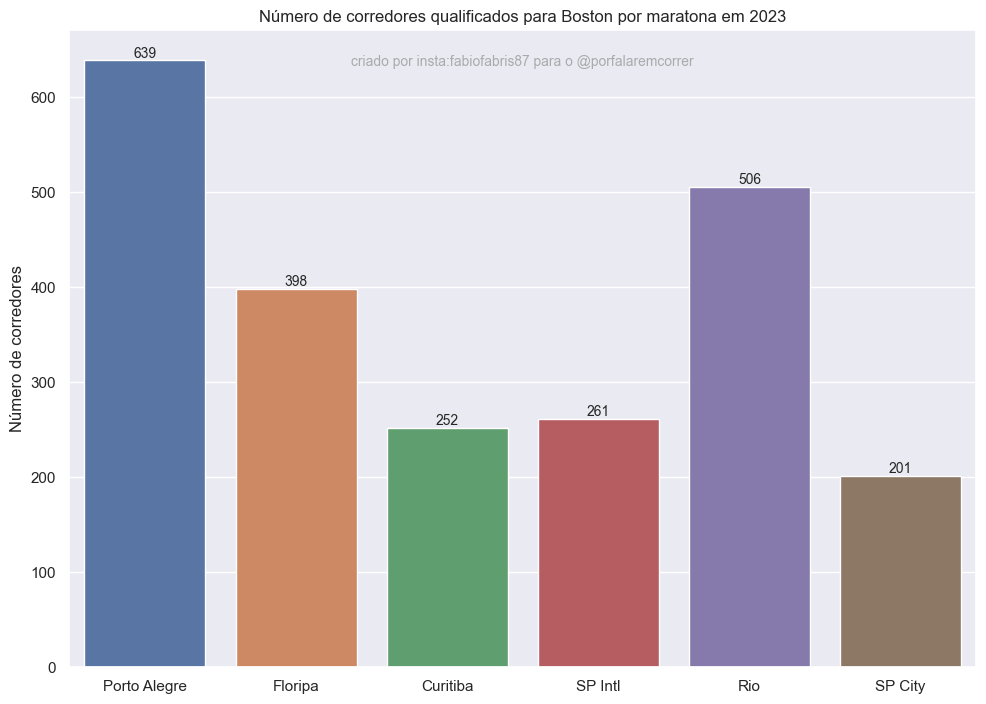

In [35]:
tmp_df = df[df["boston_cutoff"].notna()].groupby("maratona").agg({"boston_qualified":"sum"}).reset_index()
tmp_df["boston_qualified"] = tmp_df["boston_qualified"]

ax = sns.barplot(data=tmp_df.sort_values(["maratona"], ascending=[True], key=sorting_mara), x="maratona", y="boston_qualified")

ax.set_title("Número de corredores qualificados para Boston por maratona em 2023")
ax.set(ylabel='Número de corredores', xlabel='')
ax.bar_label(ax.containers[0], fontsize=10);
ax.text(0.50, 0.95, 'criado por insta:fabiofabris87 para o @porfalaremcorrer', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0)

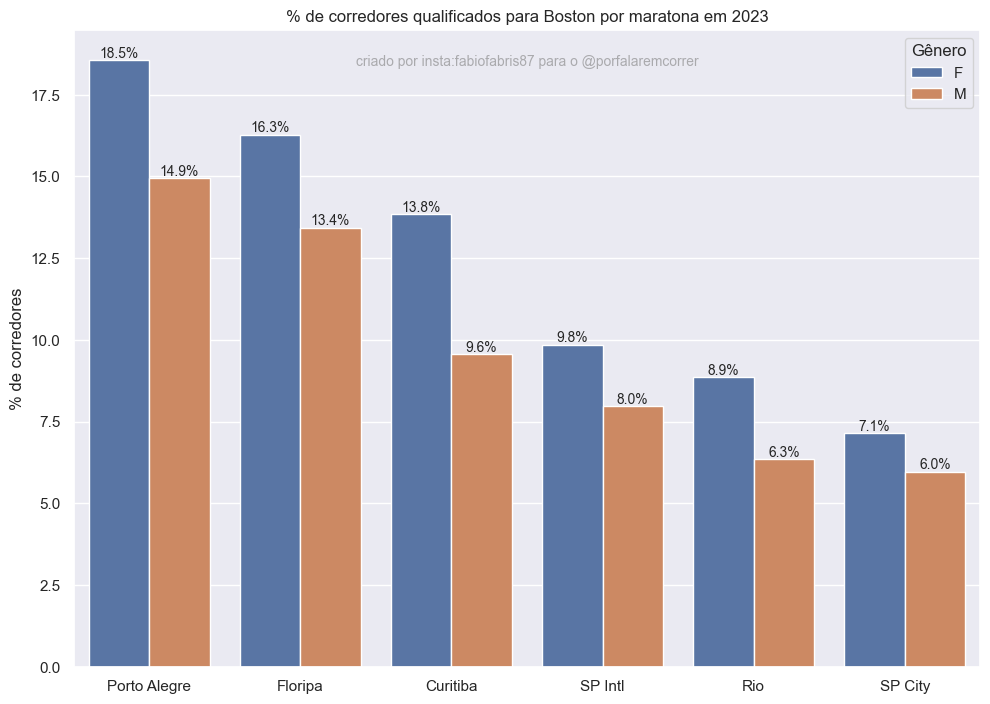

In [36]:
tmp_df = df[df["boston_cutoff"].notna()].groupby(["maratona", "gender"]).agg({"boston_qualified":"mean"}).reset_index()
tmp_df["boston_qualified"] = tmp_df["boston_qualified"]*100


ax = sns.barplot(data=tmp_df.sort_values(["maratona"], ascending=[True], key=sorting_mara), x="maratona", y="boston_qualified", hue="gender")

ax.bar_label(ax.containers[0], fontsize=10, fmt=lambda x: "{:02.1f}%".format(x));
ax.bar_label(ax.containers[1], fontsize=10, fmt=lambda x: "{:02.1f}%".format(x));

ax.set_title("% de corredores qualificados para Boston por maratona em 2023")
ax.set(ylabel='% de corredores', xlabel='')

ax.text(0.50, 0.95, 'criado por insta:fabiofabris87 para o @porfalaremcorrer', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0)

ax.legend(title='Gênero', loc='upper right')#, labels=['F', 'M'])


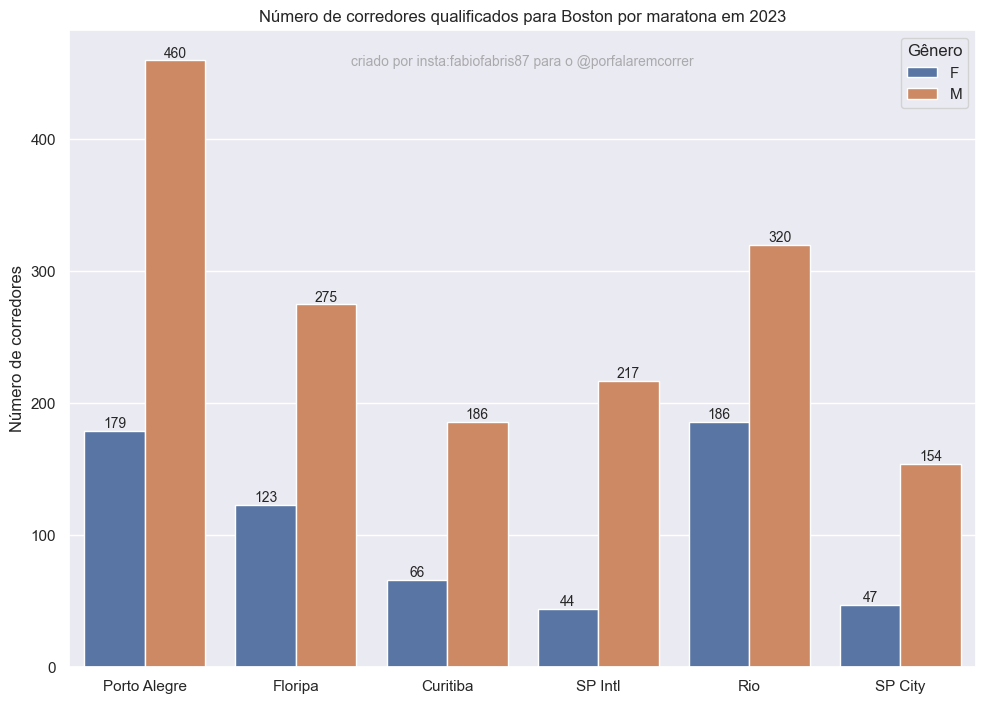

In [37]:
tmp_df = df[df["boston_cutoff"].notna()].groupby(["maratona", "gender"]).agg({"boston_qualified":"sum"}).reset_index()
tmp_df["boston_qualified"] = tmp_df["boston_qualified"]


ax = sns.barplot(data=tmp_df.sort_values(["maratona"], ascending=[True], key=sorting_mara), x="maratona", y="boston_qualified", hue="gender")

ax.bar_label(ax.containers[0], fontsize=10);
ax.bar_label(ax.containers[1], fontsize=10);

ax.set_title("Número de corredores qualificados para Boston por maratona em 2023")
ax.set(ylabel='Número de corredores', xlabel='')

ax.text(0.50, 0.95, 'criado por insta:fabiofabris87 para o @porfalaremcorrer', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0)

ax.legend(title='Gênero', loc='upper right')#, labels=['F', 'M'])


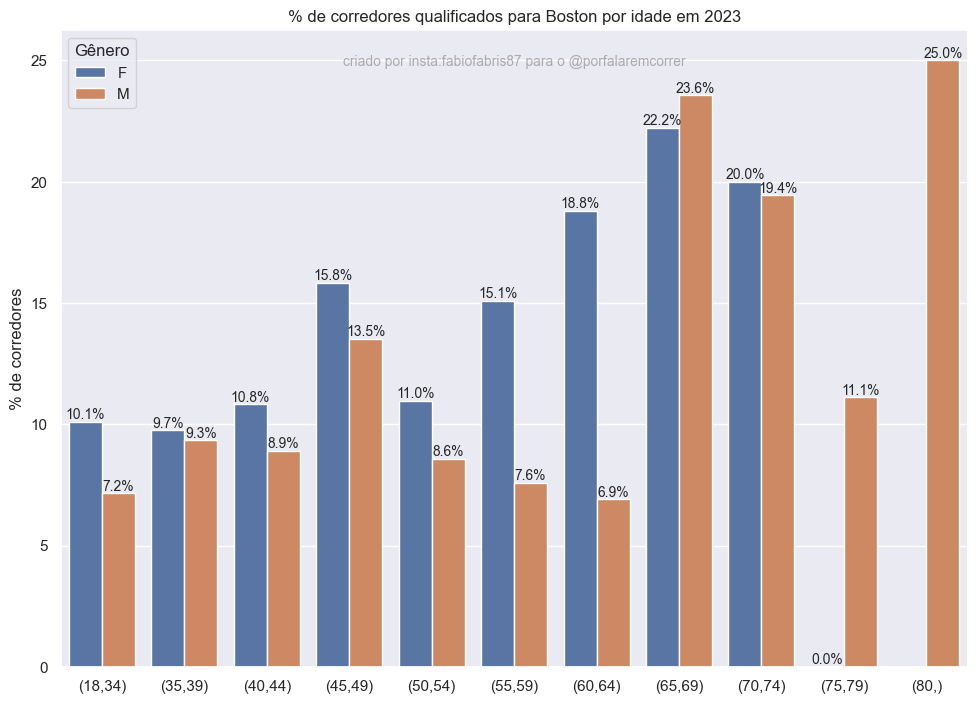

In [38]:
tmp_df = df[df["boston_cutoff"].notna()].groupby(["age_cat", "gender"]).agg({"boston_qualified":"mean"}).reset_index()
tmp_df["boston_qualified"] = tmp_df["boston_qualified"]*100

ax = sns.barplot(data=tmp_df.sort_values(["age_cat"], ascending=[True], key=sorting_mara), x="age_cat", y="boston_qualified", hue="gender")

ax.bar_label(ax.containers[0], fontsize=10, fmt=lambda x: "{:02.1f}%".format(x));
ax.bar_label(ax.containers[1], fontsize=10, fmt=lambda x: "{:02.1f}%".format(x));

ax.set_title("% de corredores qualificados para Boston por idade em 2023")
ax.set(ylabel='% de corredores', xlabel='')

ax.text(0.50, 0.95, 'criado por insta:fabiofabris87 para o @porfalaremcorrer', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0)

ax.legend(title='Gênero', loc='upper left')#, labels=['F', 'M'])


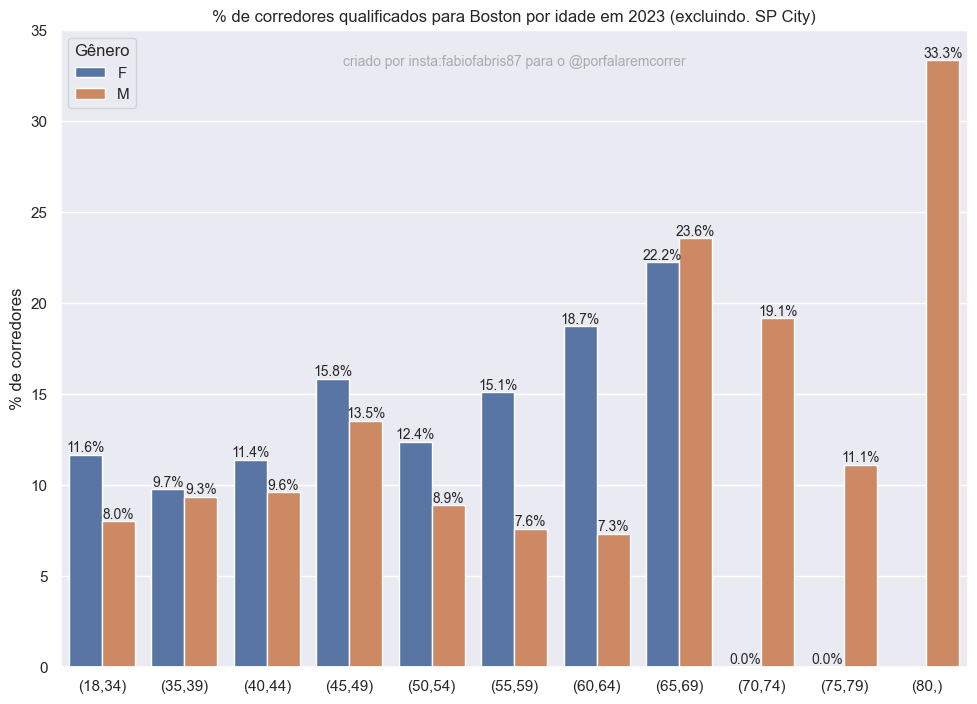

In [39]:
tmp_df = df[(df["boston_cutoff"].notna()) & (df["maratona"] != "SP City")].groupby(["age_cat", "gender"]).agg({"boston_qualified":"mean"}).reset_index()
tmp_df["boston_qualified"] = tmp_df["boston_qualified"]*100

ax = sns.barplot(data=tmp_df.sort_values(["age_cat"], ascending=[True], key=sorting_mara), x="age_cat", y="boston_qualified", hue="gender")

ax.bar_label(ax.containers[0], fontsize=10, fmt=lambda x: "{:02.1f}%".format(x));
ax.bar_label(ax.containers[1], fontsize=10, fmt=lambda x: "{:02.1f}%".format(x));

ax.set_title("% de corredores qualificados para Boston por idade em 2023 (excluindo. SP City)")
ax.set(ylabel='% de corredores', xlabel='')

ax.text(0.50, 0.95, 'criado por insta:fabiofabris87 para o @porfalaremcorrer', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0)

ax.legend(title='Gênero', loc='upper left')#, labels=['F', 'M'])


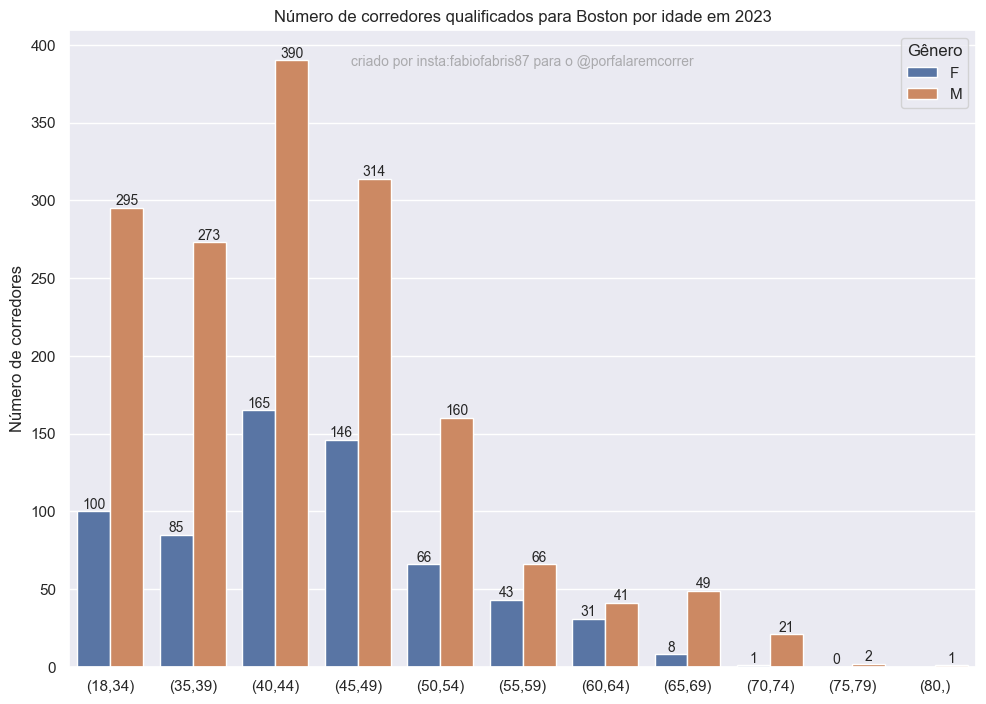

In [40]:
tmp_df = df[df["boston_cutoff"].notna()].groupby(["age_cat", "gender"]).agg({"boston_qualified":"sum"}).reset_index()
ax = sns.barplot(data=tmp_df.sort_values(["age_cat"], ascending=[True], key=sorting_mara), x="age_cat", y="boston_qualified", hue="gender")

ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)

ax.set_title("Número de corredores qualificados para Boston por idade em 2023")
ax.set(ylabel='Número de corredores', xlabel='')

ax.text(0.50, 0.95, 'criado por insta:fabiofabris87 para o @porfalaremcorrer', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0)

ax.legend(title='Gênero', loc='upper right')#, labels=['F', 'M'])


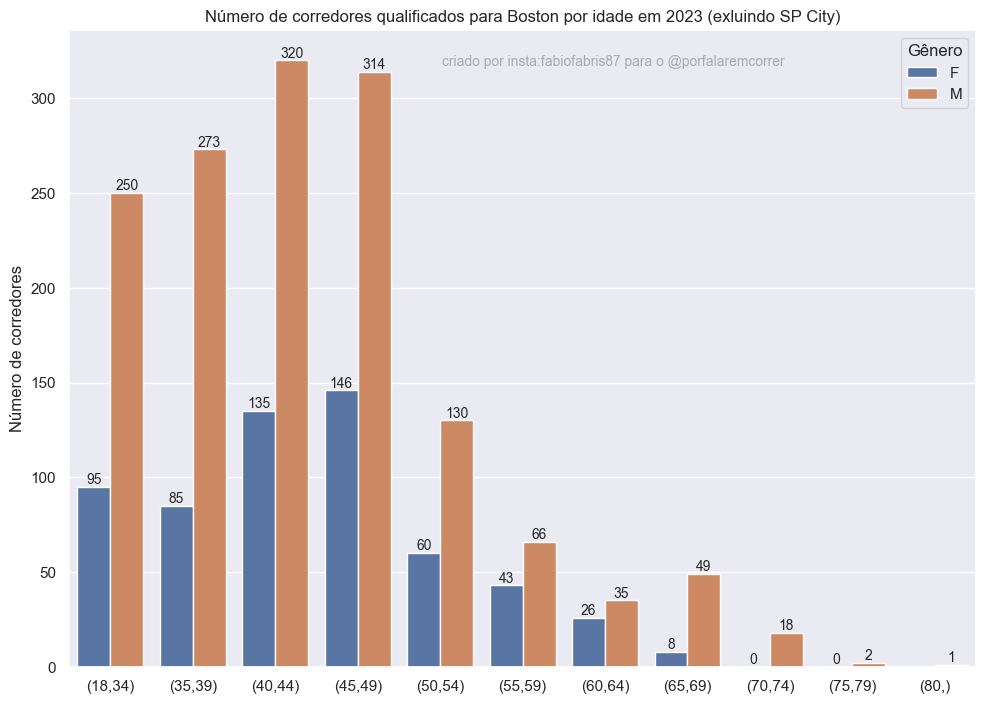

In [41]:
tmp_df = df[df["boston_cutoff"].notna() & (df["maratona"] != "SP City")].groupby(["age_cat", "gender"]).agg({"boston_qualified":"sum"}).reset_index()
ax = sns.barplot(data=tmp_df.sort_values(["age_cat"], ascending=[True], key=sorting_mara), x="age_cat", y="boston_qualified", hue="gender")

ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)

ax.set_title("Número de corredores qualificados para Boston por idade em 2023 (exluindo SP City)")
ax.set(ylabel='Número de corredores', xlabel='')

ax.text(0.60, 0.95, 'criado por insta:fabiofabris87 para o @porfalaremcorrer', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0)

ax.legend(title='Gênero', loc='upper right')#, labels=['F', 'M'])


[Text(0, 0.5, 'Número de corredores'), Text(0.5, 0, '')]

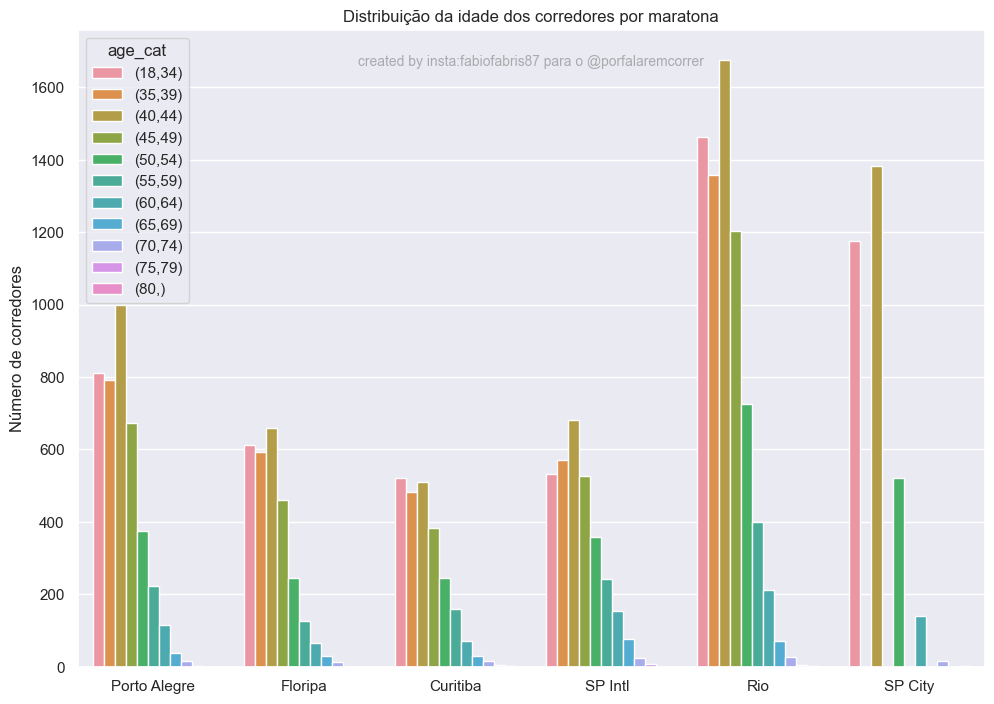

In [42]:
tmp_df = df[df["boston_cutoff"].notna()].groupby(["maratona", "age_cat"]).agg({"boston_qualified":"count"}).reset_index()
ax = sns.barplot(data=tmp_df.sort_values(["maratona", "age_cat"], ascending=[True, True], key=sorting_mara),
                 x="maratona", y="boston_qualified", hue="age_cat")

ax.text(0.50, 0.95, 'created by insta:fabiofabris87 para o @porfalaremcorrer', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0);

ax.set_title("Distribuição da idade dos corredores por maratona")
ax.set(ylabel='Número de corredores', xlabel='')

[Text(0, 0.5, 'Número de corredores'), Text(0.5, 0, '')]

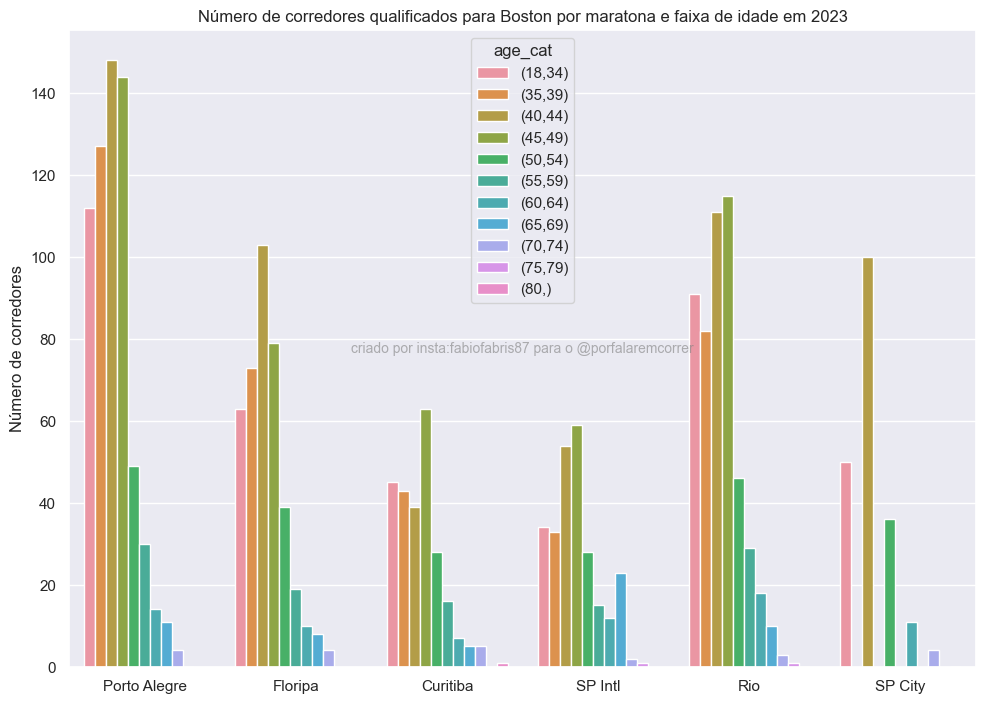

In [43]:
tmp_df = df[df["boston_cutoff"].notna()].groupby(["maratona", "age_cat"]).agg({"boston_qualified":"sum"}).reset_index()
ax = sns.barplot(data=tmp_df.sort_values(["maratona", "age_cat"], ascending=[True, True], key=sorting_mara),
                 x="maratona", y="boston_qualified", hue="age_cat")

ax.text(0.50, 0.5, 'criado por insta:fabiofabris87 para o @porfalaremcorrer', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0);

ax.set_title("Número de corredores qualificados para Boston por maratona e faixa de idade em 2023")
ax.set(ylabel='Número de corredores', xlabel='')

[Text(0, 0.5, '% de corredores'), Text(0.5, 0, '')]

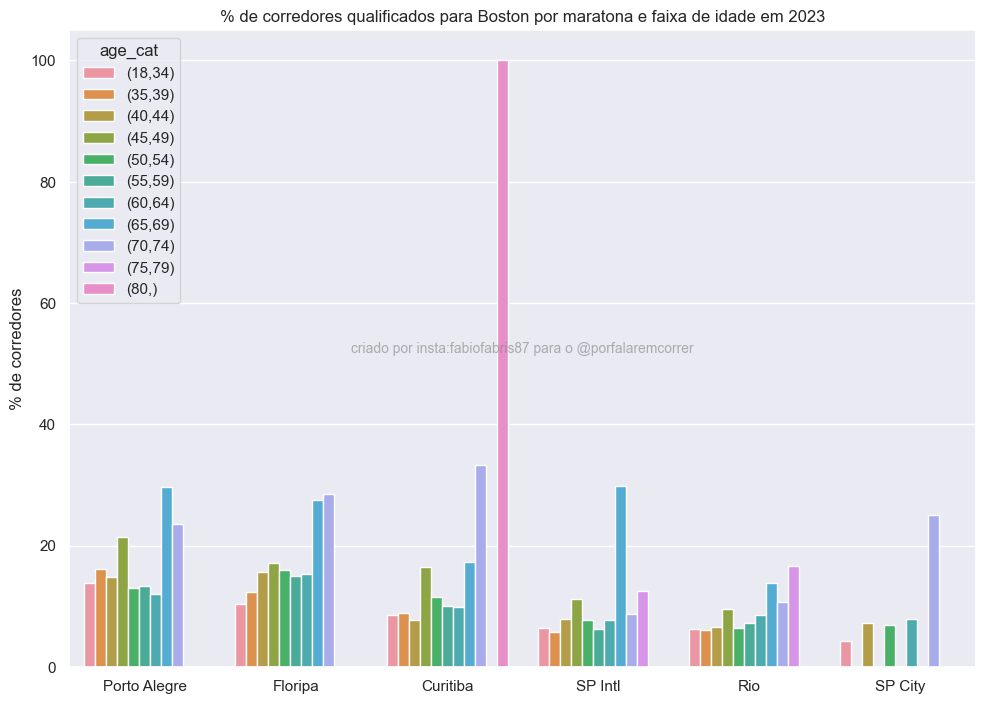

In [44]:
tmp_df = df[df["boston_cutoff"].notna()].groupby(["maratona", "age_cat"]).agg({"boston_qualified":"mean"}).reset_index()

tmp_df["boston_qualified"] = tmp_df["boston_qualified"]*100


ax = sns.barplot(data=tmp_df.sort_values(["maratona", "age_cat"], ascending=[True, True], key=sorting_mara),
                 x="maratona", y="boston_qualified", hue="age_cat")

ax.text(0.50, 0.5, 'criado por insta:fabiofabris87 para o @porfalaremcorrer', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0);

ax.set_title("% de corredores qualificados para Boston por maratona e faixa de idade em 2023")
ax.set(ylabel='% de corredores', xlabel='')

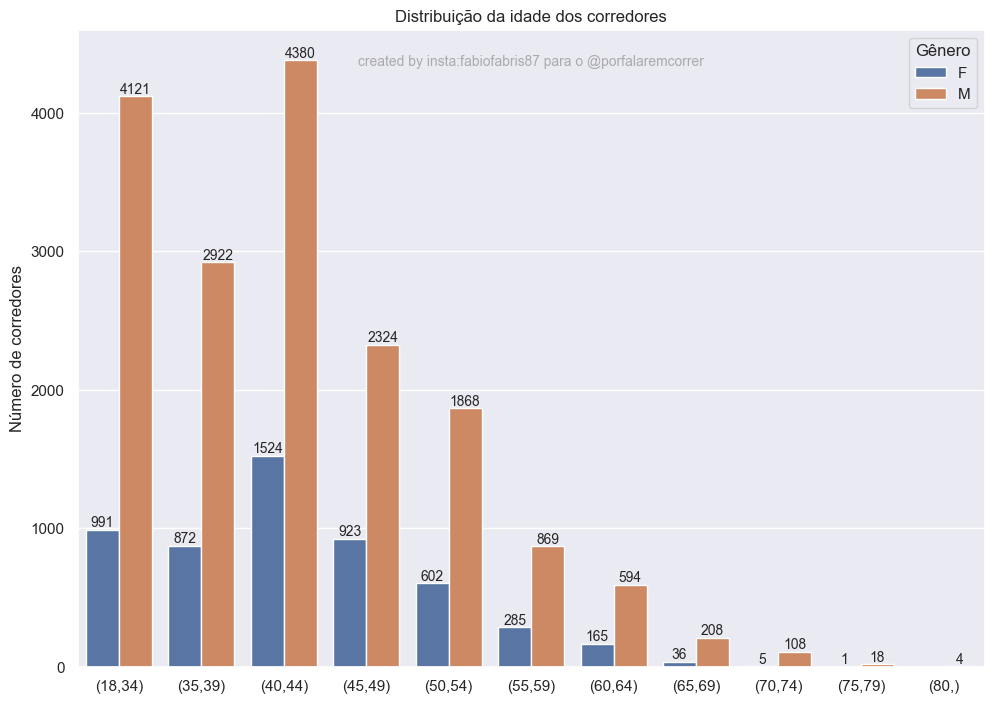

In [45]:
tmp_df = df[df["boston_cutoff"].notna()].groupby(["age_cat", "gender"]).agg({"boston_qualified":"count"}).reset_index()
ax = sns.barplot(data=tmp_df.sort_values(["gender", "age_cat"], ascending=[True, True], key=sorting_mara), x="age_cat", y="boston_qualified", hue="gender")

ax.text(0.50, 0.95, 'created by insta:fabiofabris87 para o @porfalaremcorrer', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0);

ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)


ax.set_title("Distribuição da idade dos corredores")
ax.set(ylabel='Número de corredores', xlabel='')
ax.legend(title='Gênero', loc='upper right')#, labels=['F', 'M'])


[Text(0, 0.5, 'Número de corredores'), Text(0.5, 0, '')]

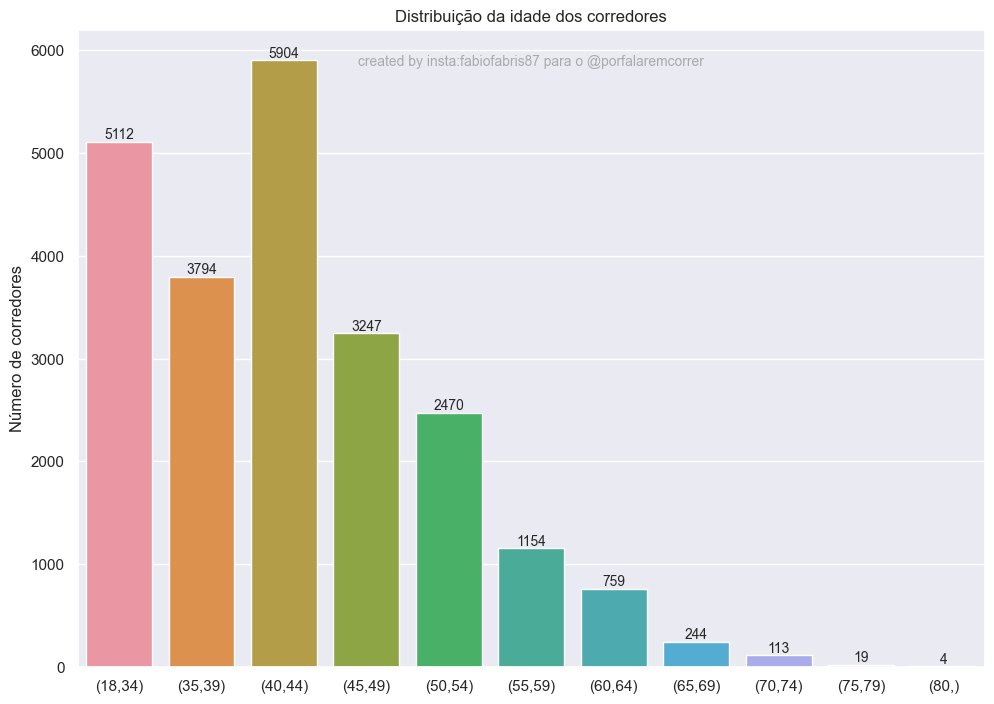

In [46]:
tmp_df = df[df["boston_cutoff"].notna()].groupby(["age_cat"]).agg({"boston_qualified":"count"}).reset_index()
ax = sns.barplot(data=tmp_df.sort_values(["age_cat"], ascending=[True], key=sorting_mara), x="age_cat", y="boston_qualified")

ax.text(0.50, 0.95, 'created by insta:fabiofabris87 para o @porfalaremcorrer', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0);

ax.bar_label(ax.containers[0], fontsize=10)

ax.set_title("Distribuição da idade dos corredores")
ax.set(ylabel='Número de corredores', xlabel='')

[Text(0, 0.5, 'Número de corredores'), Text(0.5, 0, '')]

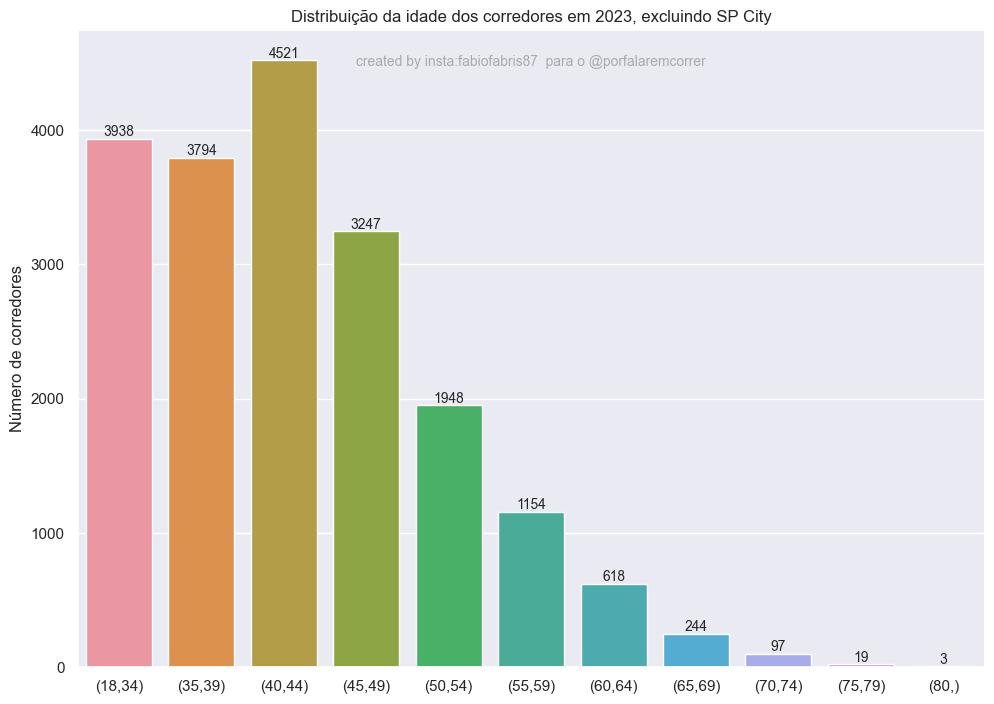

In [47]:
tmp_df = df[df["boston_cutoff"].notna() & (df["maratona"] != "SP City")].groupby(["age_cat"]).agg({"boston_qualified":"count"}).reset_index()
ax = sns.barplot(data=tmp_df.sort_values(["age_cat"], ascending=[True], key=sorting_mara), x="age_cat", y="boston_qualified")

ax.text(0.50, 0.95, 'created by insta:fabiofabris87  para o @porfalaremcorrer', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0);

ax.bar_label(ax.containers[0], fontsize=10)

ax.set_title("Distribuição da idade dos corredores em 2023, excluindo SP City")
ax.set(ylabel='Número de corredores', xlabel='')

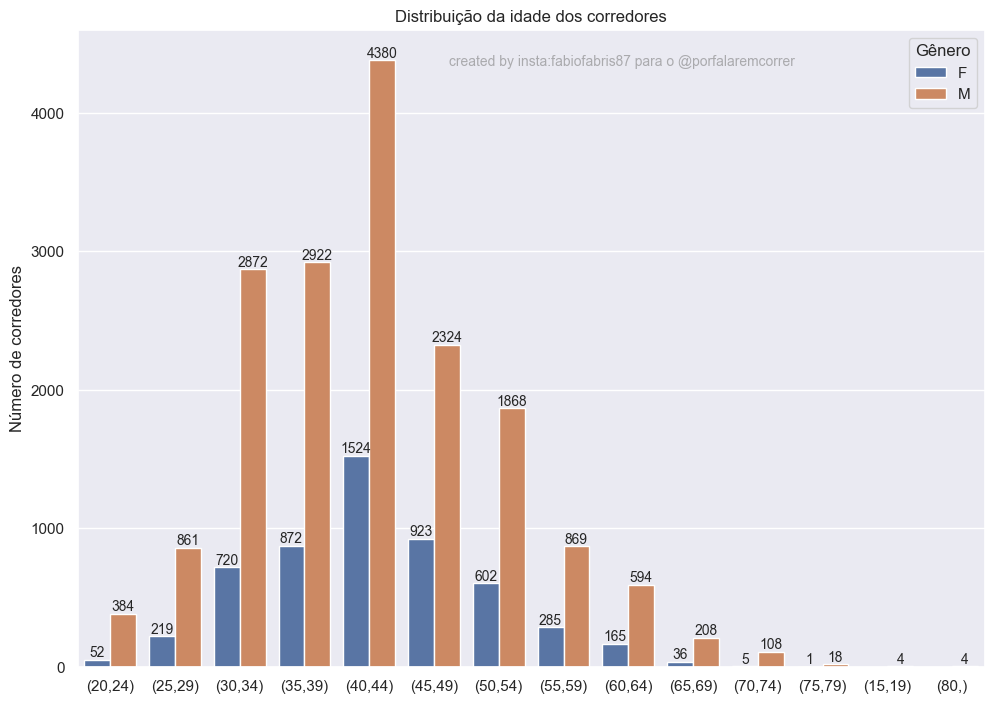

In [48]:
tmp_df = df[df["boston_cutoff"].notna()].groupby(["age_cat_2", "gender"]).agg({"boston_qualified":"count"}).reset_index()
ax = sns.barplot(data=tmp_df.sort_values(["gender","age_cat_2"], ascending=[True, True], key=sorting_mara), x="age_cat_2", y="boston_qualified", hue="gender")

ax.text(0.60, 0.95, 'created by insta:fabiofabris87 para o @porfalaremcorrer', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0);

ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)

ax.set_title("Distribuição da idade dos corredores")
ax.set(ylabel='Número de corredores', xlabel='')
ax.legend(title='Gênero', loc='upper right')#, labels=['F', 'M'])


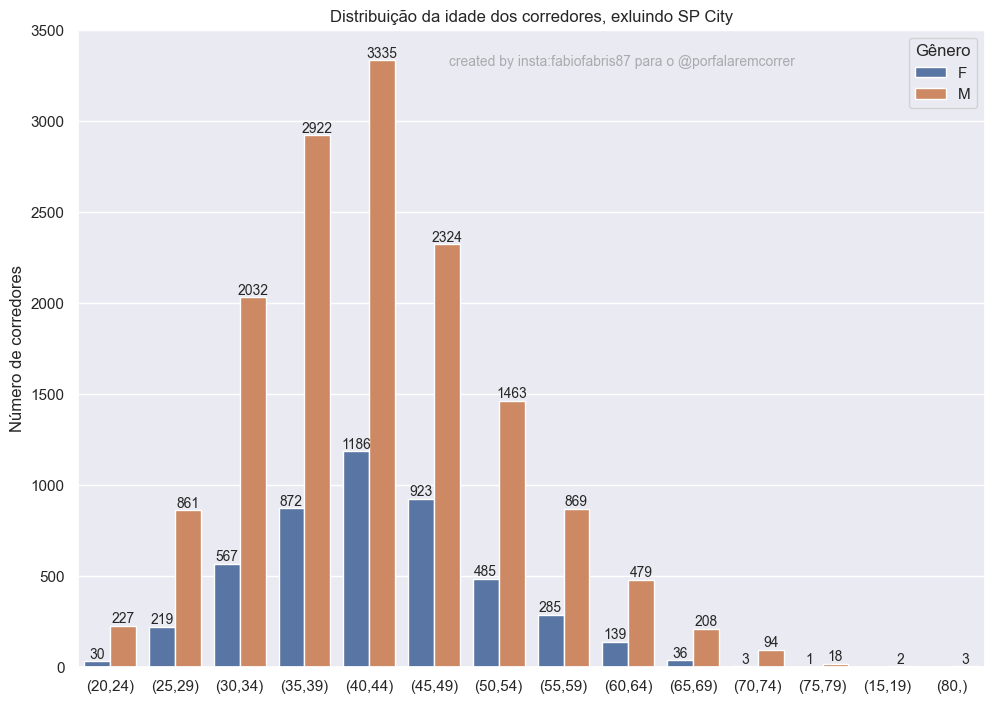

In [49]:
tmp_df = df[df["boston_cutoff"].notna() & (df["maratona"] != "SP City")].groupby(["age_cat_2", "gender"]).agg({"boston_qualified":"count"}).reset_index()
ax = sns.barplot(data=tmp_df.sort_values(["gender", "age_cat_2"], ascending=[True, True], key=sorting_mara), x="age_cat_2", y="boston_qualified", hue="gender")

ax.text(0.60, 0.95, 'created by insta:fabiofabris87 para o @porfalaremcorrer', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0);

ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)

ax.set_title("Distribuição da idade dos corredores, exluindo SP City")
ax.set(ylabel='Número de corredores', xlabel='')
ax.legend(title='Gênero', loc='upper right')#, labels=['F', 'M'])


In [50]:
def time_cat(x):
    time = x.time_in_hours
    if(time >= 2 and time < 3):
        return "(2:00,2:59)"
    if(time >= 3 and time < 4):
        return "(3:00,3:59)"
    if(time >= 4 and time < 5):
        return "(4:00,4:59)"
    if(time >= 5 and time < 6):
        return "(5:00,5:59)"

In [51]:
df["time_cat"] = df.apply(time_cat, axis=1)

[Text(0, 0.5, '% de corredores'), Text(0.5, 0, '')]

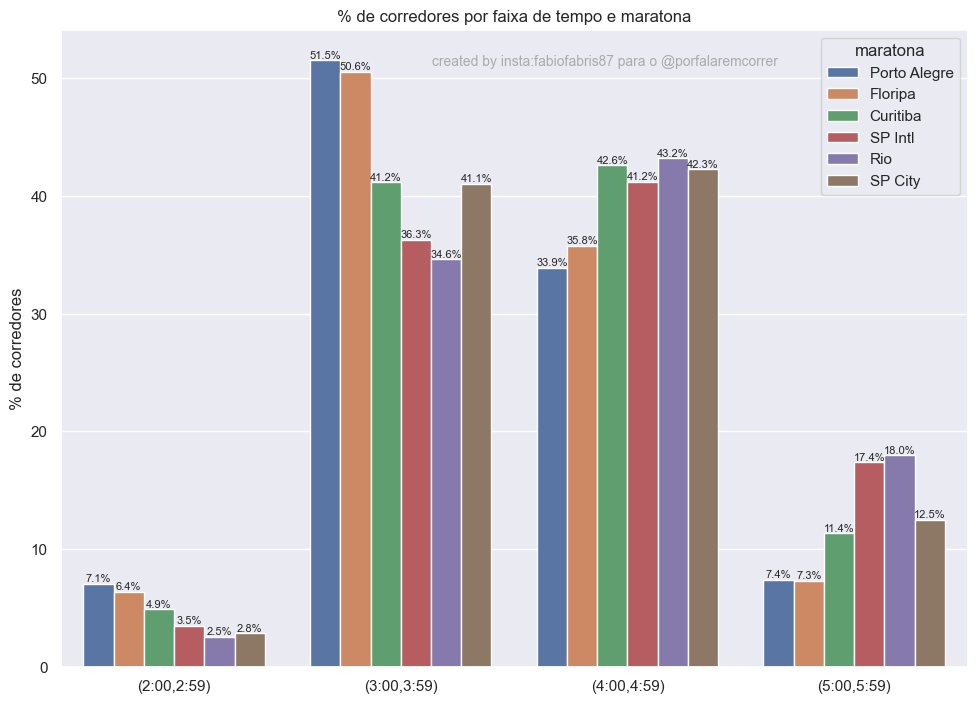

In [52]:
tmp_df = df.groupby(["maratona", "time_cat"]).agg({"name":"count"}).reset_index()
tmp_df = tmp_df.set_index("maratona")
tmp_df["total_per_marathon"] = df.groupby(["maratona"]).agg({"name":"count"})
tmp_df = tmp_df.reset_index()
tmp_df["ratio"] = tmp_df["name"]/tmp_df["total_per_marathon"]*100

ax = sns.barplot(data=tmp_df.sort_values(["maratona", "time_cat"], ascending=[True, True], key=sorting_mara),
                 x="time_cat", y="ratio", hue="maratona")

ax.bar_label(ax.containers[0], fontsize=8, fmt=lambda x: "{:02.1f}%".format(x));
ax.bar_label(ax.containers[1], fontsize=8, fmt=lambda x: "{:02.1f}%".format(x));
ax.bar_label(ax.containers[2], fontsize=8, fmt=lambda x: "{:02.1f}%".format(x));
ax.bar_label(ax.containers[3], fontsize=8, fmt=lambda x: "{:02.1f}%".format(x));
ax.bar_label(ax.containers[4], fontsize=8, fmt=lambda x: "{:02.1f}%".format(x));
ax.bar_label(ax.containers[5], fontsize=8, fmt=lambda x: "{:02.1f}%".format(x));

ax.text(0.60, 0.95, 'created by insta:fabiofabris87 para o @porfalaremcorrer', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0);

ax.set_title("% de corredores por faixa de tempo e maratona")
ax.set(ylabel='% de corredores', xlabel='')

[Text(0, 0.5, '% de corredores'), Text(0.5, 0, '')]

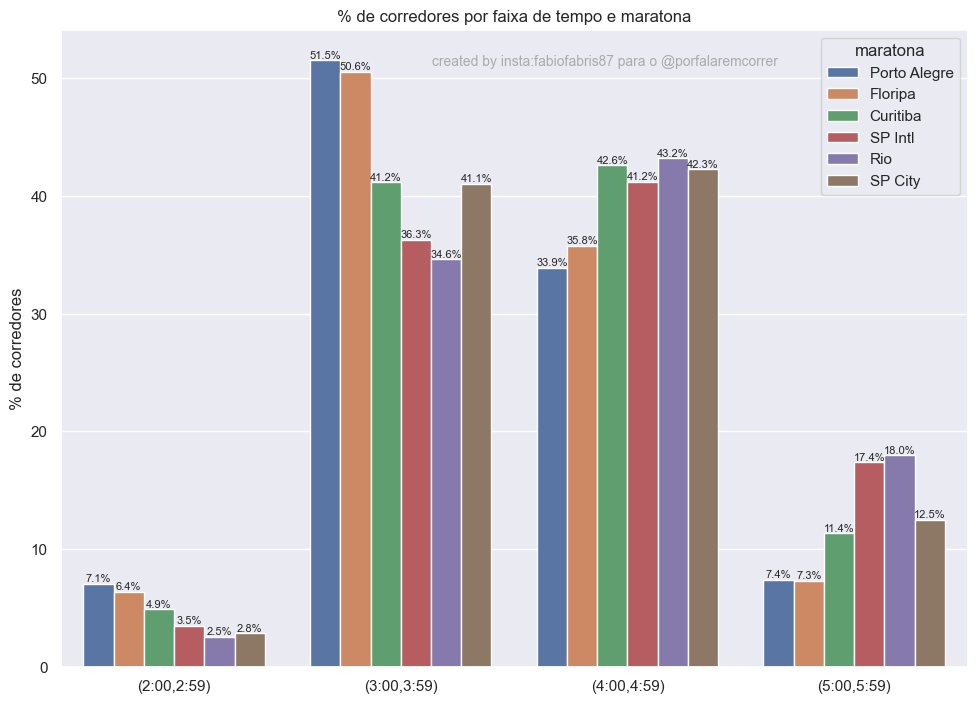

In [53]:
tmp_df = df.groupby(["maratona", "time_cat"]).agg({"name":"count"}).reset_index()
tmp_df = tmp_df.set_index("maratona")
tmp_df["total_per_marathon"] = df.groupby(["maratona"]).agg({"name":"count"})
tmp_df = tmp_df.reset_index()
tmp_df["ratio"] = tmp_df["name"]/tmp_df["total_per_marathon"]*100

ax = sns.barplot(data=tmp_df.sort_values(["maratona", "time_cat"], ascending=[True, True], key=sorting_mara),
                 x="time_cat", y="ratio", hue="maratona")

ax.bar_label(ax.containers[0], fontsize=8, fmt=lambda x: "{:02.1f}%".format(x));
ax.bar_label(ax.containers[1], fontsize=8, fmt=lambda x: "{:02.1f}%".format(x));
ax.bar_label(ax.containers[2], fontsize=8, fmt=lambda x: "{:02.1f}%".format(x));
ax.bar_label(ax.containers[3], fontsize=8, fmt=lambda x: "{:02.1f}%".format(x));
ax.bar_label(ax.containers[4], fontsize=8, fmt=lambda x: "{:02.1f}%".format(x));
ax.bar_label(ax.containers[5], fontsize=8, fmt=lambda x: "{:02.1f}%".format(x));

ax.text(0.60, 0.95, 'created by insta:fabiofabris87 para o @porfalaremcorrer', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0);

ax.set_title("% de corredores por faixa de tempo e maratona")
ax.set(ylabel='% de corredores', xlabel='')

[Text(0, 0.5, '% de corredores'), Text(0.5, 0, '')]

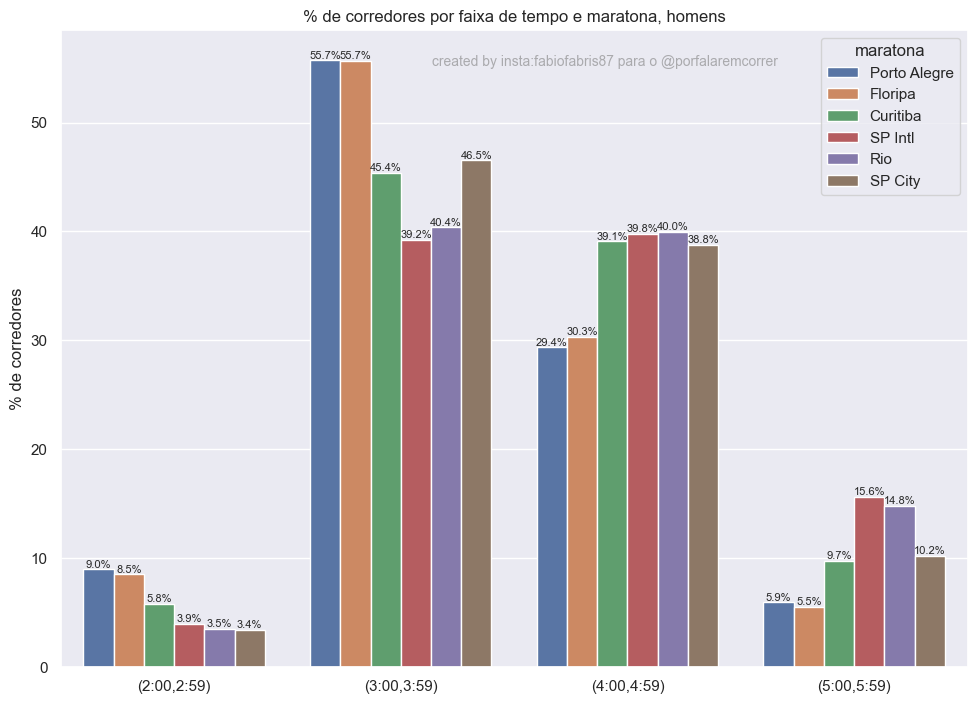

In [54]:
tmp_df = df[df.gender == "M"].groupby(["maratona", "time_cat"]).agg({"name":"count"}).reset_index()
tmp_df = tmp_df.set_index("maratona")
tmp_df["total_per_marathon"] = df[df.gender == "M"].groupby(["maratona"]).agg({"name":"count"})
tmp_df = tmp_df.reset_index()
tmp_df["ratio"] = tmp_df["name"]/tmp_df["total_per_marathon"]*100

ax = sns.barplot(data=tmp_df.sort_values(["maratona", "time_cat"], ascending=[True, True], key=sorting_mara),
                 x="time_cat", y="ratio", hue="maratona")

ax.text(0.60, 0.95, 'created by insta:fabiofabris87 para o @porfalaremcorrer', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0);

ax.bar_label(ax.containers[0], fontsize=8, fmt=lambda x: "{:02.1f}%".format(x));
ax.bar_label(ax.containers[1], fontsize=8, fmt=lambda x: "{:02.1f}%".format(x));
ax.bar_label(ax.containers[2], fontsize=8, fmt=lambda x: "{:02.1f}%".format(x));
ax.bar_label(ax.containers[3], fontsize=8, fmt=lambda x: "{:02.1f}%".format(x));
ax.bar_label(ax.containers[4], fontsize=8, fmt=lambda x: "{:02.1f}%".format(x));
ax.bar_label(ax.containers[5], fontsize=8, fmt=lambda x: "{:02.1f}%".format(x));

ax.set_title("% de corredores por faixa de tempo e maratona, homens")
ax.set(ylabel='% de corredores', xlabel='')

[Text(0, 0.5, '% de corredores'), Text(0.5, 0, '')]

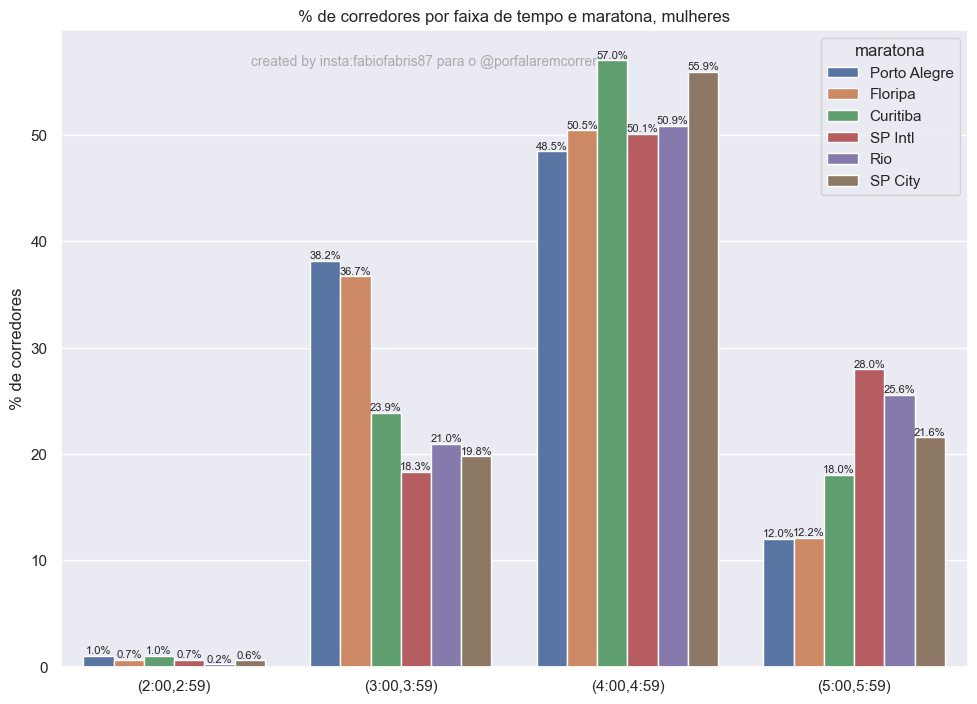

In [55]:
tmp_df = df[df.gender == "F"].groupby(["maratona", "time_cat"]).agg({"name":"count"}).reset_index()
tmp_df = tmp_df.set_index("maratona")
tmp_df["total_per_marathon"] = df[df.gender == "F"].groupby(["maratona"]).agg({"name":"count"})
tmp_df = tmp_df.reset_index()
tmp_df["ratio"] = tmp_df["name"]/tmp_df["total_per_marathon"]*100

ax = sns.barplot(data=tmp_df.sort_values(["maratona", "time_cat"], ascending=[True, True], key=sorting_mara),
                 x="time_cat", y="ratio", hue="maratona")

ax.text(0.40, 0.95, 'created by insta:fabiofabris87 para o @porfalaremcorrer', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0);

ax.bar_label(ax.containers[0], fontsize=8, fmt=lambda x: "{:02.1f}%".format(x));
ax.bar_label(ax.containers[1], fontsize=8, fmt=lambda x: "{:02.1f}%".format(x));
ax.bar_label(ax.containers[2], fontsize=8, fmt=lambda x: "{:02.1f}%".format(x));
ax.bar_label(ax.containers[3], fontsize=8, fmt=lambda x: "{:02.1f}%".format(x));
ax.bar_label(ax.containers[4], fontsize=8, fmt=lambda x: "{:02.1f}%".format(x));
ax.bar_label(ax.containers[5], fontsize=8, fmt=lambda x: "{:02.1f}%".format(x));

ax.set_title("% de corredores por faixa de tempo e maratona, mulheres")
ax.set(ylabel='% de corredores', xlabel='')

[Text(0, 0.5, 'Número de corredores'), Text(0.5, 0, '')]

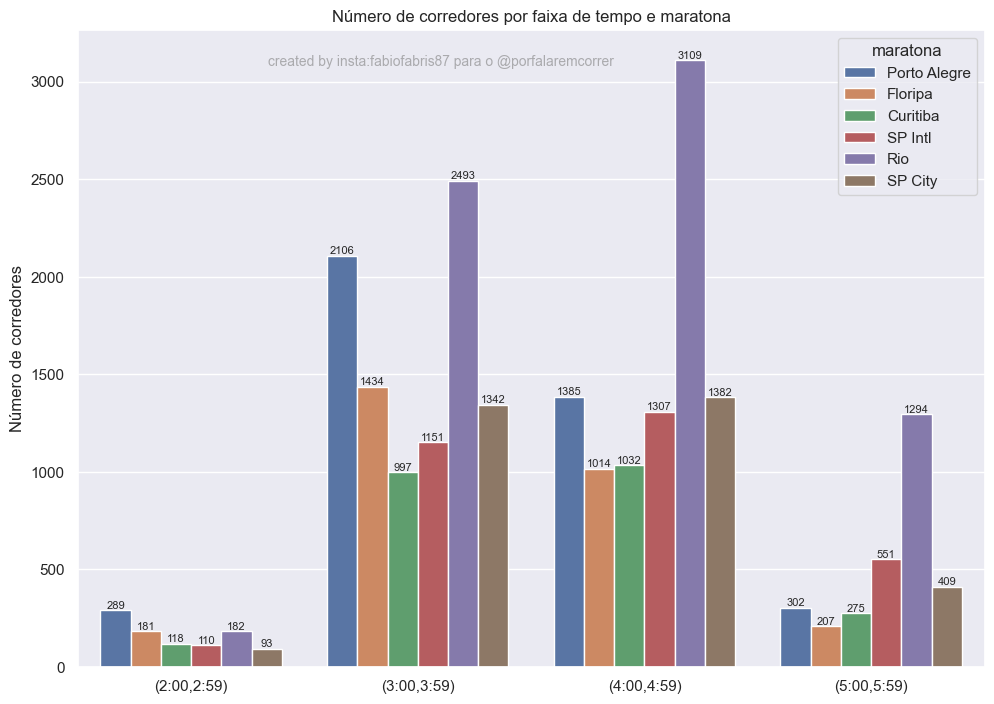

In [56]:
tmp_df = df.groupby(["maratona", "time_cat"]).agg({"name":"count"}).reset_index()

ax = sns.barplot(data=tmp_df.sort_values(["maratona", "time_cat"], ascending=[True, True], key=sorting_mara),
                 x="time_cat", y="name", hue="maratona")

ax.text(0.40, 0.95, 'created by insta:fabiofabris87 para o @porfalaremcorrer', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0);

ax.bar_label(ax.containers[0], fontsize=8);
ax.bar_label(ax.containers[1], fontsize=8);
ax.bar_label(ax.containers[2], fontsize=8);
ax.bar_label(ax.containers[3], fontsize=8);
ax.bar_label(ax.containers[4], fontsize=8);
ax.bar_label(ax.containers[5], fontsize=8);

ax.set_title("Número de corredores por faixa de tempo e maratona")
ax.set(ylabel='Número de corredores', xlabel='')

[Text(0, 0.5, 'Número de corredores'), Text(0.5, 0, '')]

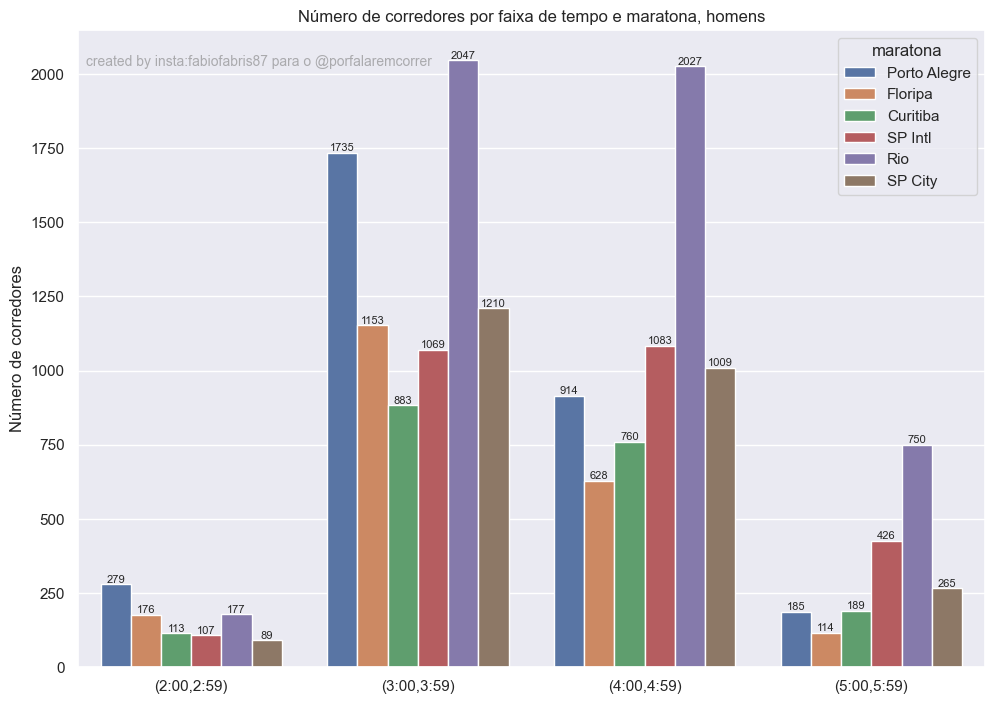

In [57]:
tmp_df = df[df.gender == "M"].groupby(["maratona", "time_cat"]).agg({"name":"count"}).reset_index()

ax = sns.barplot(data=tmp_df.sort_values(["maratona", "time_cat"], ascending=[True, True], key=sorting_mara),
                 x="time_cat", y="name", hue="maratona")

ax.text(0.20, 0.95, 'created by insta:fabiofabris87 para o @porfalaremcorrer', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0);

ax.bar_label(ax.containers[0], fontsize=8);
ax.bar_label(ax.containers[1], fontsize=8);
ax.bar_label(ax.containers[2], fontsize=8);
ax.bar_label(ax.containers[3], fontsize=8);
ax.bar_label(ax.containers[4], fontsize=8);
ax.bar_label(ax.containers[5], fontsize=8);

ax.set_title("Número de corredores por faixa de tempo e maratona, homens")
ax.set(ylabel='Número de corredores', xlabel='')

[Text(0, 0.5, 'Número de corredores'), Text(0.5, 0, '')]

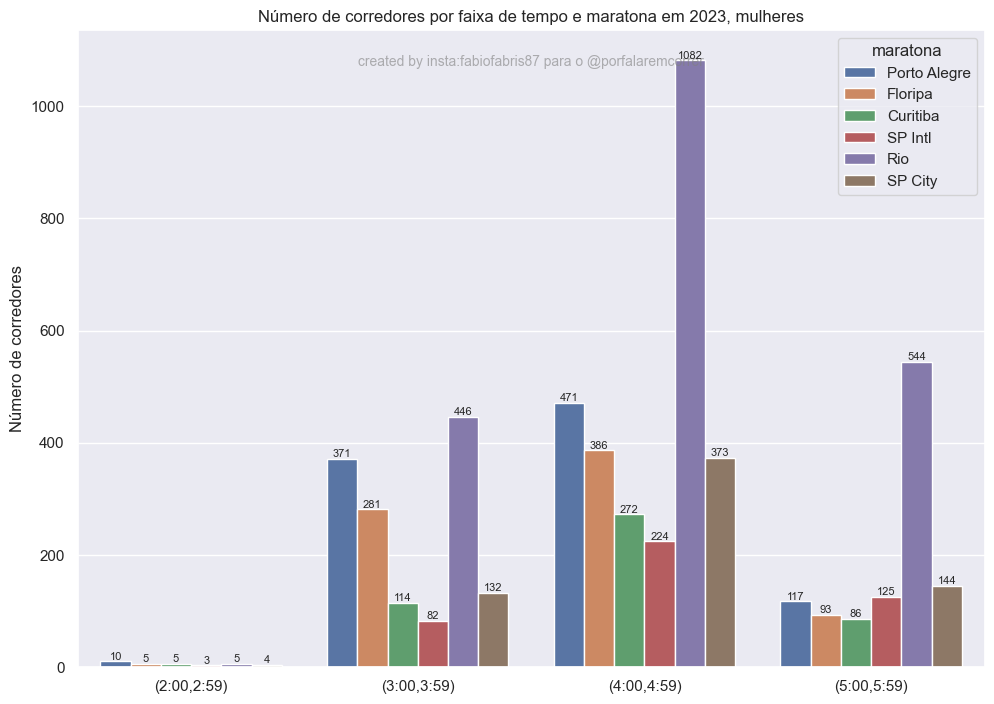

In [58]:
tmp_df = df[df.gender == "F"].groupby(["maratona", "time_cat"]).agg({"name":"count"}).reset_index()

ax = sns.barplot(data=tmp_df.sort_values(["maratona", "time_cat"], ascending=[True, True], key=sorting_mara),
                 x="time_cat", y="name", hue="maratona")

ax.text(0.50, 0.95, 'created by insta:fabiofabris87 para o @porfalaremcorrer', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0);

ax.bar_label(ax.containers[0], fontsize=8);
ax.bar_label(ax.containers[1], fontsize=8);
ax.bar_label(ax.containers[2], fontsize=8);
ax.bar_label(ax.containers[3], fontsize=8);
ax.bar_label(ax.containers[4], fontsize=8);
ax.bar_label(ax.containers[5], fontsize=8);

ax.set_title("Número de corredores por faixa de tempo e maratona em 2023, mulheres")
ax.set(ylabel='Número de corredores', xlabel='')